<a href="https://colab.research.google.com/github/Mariam-Kadry/Car_Evaluation/blob/main/Goodreads_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
   hn import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')


#Preprocessing

##Data Loading

In [ ]:
data= pd.read_csv('/content/books.csv')
# display the first 10 rows of the dataset
data.head(15)

bookID                                              title  \
0        1  Harry Potter and the Half-Blood Prince (Harry ...   
1        2  Harry Potter and the Order of the Phoenix (Har...   
2        4  Harry Potter and the Chamber of Secrets (Harry...   
3        5  Harry Potter and the Prisoner of Azkaban (Harr...   
4        8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
5        9  Unauthorized Harry Potter Book Seven News: "Ha...   
6       10       Harry Potter Collection (Harry Potter  #1-6)   
7       12  The Ultimate Hitchhiker's Guide: Five Complete...   
8       13  The Ultimate Hitchhiker's Guide to the Galaxy ...   
9       14  The Hitchhiker's Guide to the Galaxy (Hitchhik...   
10      16  The Hitchhiker's Guide to the Galaxy (Hitchhik...   
11      18  The Ultimate Hitchhiker's Guide (Hitchhiker's ...   
12      21               A Short History of Nearly Everything   
13      22                        Bill Bryson's African Diary   
14      23  Bryson's Dictionary of Troublesome Words: A Wr...   

                       authors average_rating        isbn       isbn13  \
0   J.K. Rowling/Mary GrandPré           4.57   439785960  9.78044E+12   
1   J.K. Rowling/Mary GrandPré           4.49   439358078  9.78044E+12   
2                 J.K. Rowling           4.42   439554896  9.78044E+12   
3   J.K. Rowling/Mary GrandPré           4.56  043965548X  9.78044E+12   
4   J.K. Rowling/Mary GrandPré           4.78   439682584  9.78044E+12   
5       W. Frederick Zimmerman           3.74   976540606  9.78098E+12   
6                 J.K. Rowling           4.73   439827604  9.78044E+12   
7                Douglas Adams           4.38   517226952  9.78052E+12   
8                Douglas Adams           4.38   345453743  9.78035E+12   
9                Douglas Adams           4.22  1400052920   9.7814E+12   
10   Douglas Adams/Stephen Fry           4.22   739322206  9.78074E+12   
11               Douglas Adams           4.38   517149257  9.78052E+12   
12                 Bill Bryson           4.21  076790818X  9.78077E+12   
13                 Bill Bryson           3.44   767915062  9.78077E+12   
14                 Bill Bryson           3.87   767910435  9.78077E+12   

   language_code   num_pages  ratings_count  text_reviews_count  \
0            eng         652        2095690               27591   
1            eng         870        2153167               29221   
2            eng         352           6333                 244   
3            eng         435        2339585               36325   
4            eng        2690          41428                 164   
5          en-US         152             19                   1   
6            eng        3342          28242                 808   
7            eng         815           3628                 254   
8            eng         815         249558                4080   
9            eng         215           4930                 460   
10           eng           6           1266                 253   
11           eng         815           2877                 195   
12           eng         544         248558                9396   
13           eng          55           7270                 499   
14           eng         256           2088                 131   

   publication_date           publisher Unnamed: 12  
0         9/16/2006     Scholastic Inc.         NaN  
1          9/1/2004     Scholastic Inc.         NaN  
2         11/1/2003          Scholastic         NaN  
3          5/1/2004     Scholastic Inc.         NaN  
4         9/13/2004          Scholastic         NaN  
5         4/26/2005        Nimble Books         NaN  
6         9/12/2005          Scholastic         NaN  
7         11/1/2005      Gramercy Books         NaN  
8         4/30/2002       Del Rey Books         NaN  
9          8/3/2004               Crown         NaN  
10        3/23/2005  Random House Audio         NaN  
11        1/17/1996         Wings Books         NaN  
12 

##EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   bookID              11127 non-null  int64 
 1   title               11127 non-null  object
 2   authors             11127 non-null  object
 3   average_rating      11127 non-null  object
 4   isbn                11127 non-null  object
 5   isbn13              11127 non-null  object
 6   language_code       11127 non-null  object
 7     num_pages         11127 non-null  object
 8   ratings_count       11127 non-null  int64 
 9   text_reviews_count  11127 non-null  int64 
 10  publication_date    11127 non-null  object
 11  publisher           11127 non-null  object
 12  Unnamed: 12         4 non-null      object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


In [ ]:
data.describe()

bookID  ratings_count  text_reviews_count
count  11127.000000   1.112700e+04        11127.000000
mean   21310.938887   1.793649e+04          541.864474
std    13093.358023   1.124794e+05         2576.174610
min        1.000000   0.000000e+00            0.000000
25%    10287.000000   1.040000e+02            9.000000
50%    20287.000000   7.450000e+02           47.000000
75%    32104.500000   4.993500e+03          237.500000
max    45641.000000   4.597666e+06        94265.000000

In [ ]:
# checking for missing values
data.isnull().sum()

bookID                    0
title                     0
authors                   0
average_rating            0
isbn                      0
isbn13                    0
language_code             0
  num_pages               0
ratings_count             0
text_reviews_count        0
publication_date          0
publisher                 0
Unnamed: 12           11123
dtype: int64

In [ ]:
# checking for duplicated values
data.duplicated().sum()

0

In [ ]:
# Drop unnecessary columns
data=data.drop('Unnamed: 12', axis=1)
data=data.drop('bookID', axis=1)
data=data.drop('isbn13', axis=1)
data=data.drop('isbn', axis=1)
data=data.dropna()

In [ ]:
data.head()

title  \
0  Harry Potter and the Half-Blood Prince (Harry ...   
1  Harry Potter and the Order of the Phoenix (Har...   
2  Harry Potter and the Chamber of Secrets (Harry...   
3  Harry Potter and the Prisoner of Azkaban (Harr...   
4  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   

                      authors average_rating language_code   num_pages  \
0  J.K. Rowling/Mary GrandPré           4.57           eng         652   
1  J.K. Rowling/Mary GrandPré           4.49           eng         870   
2                J.K. Rowling           4.42           eng         352   
3  J.K. Rowling/Mary GrandPré           4.56           eng         435   
4  J.K. Rowling/Mary GrandPré           4.78           eng        2690   

   ratings_count  text_reviews_count publication_date        publisher  
0        2095690               27591        9/16/2006  Scholastic Inc.  
1        2153167               29221         9/1/2004  Scholastic Inc.  
2           6333                 244        11/1/2003       Scholastic  
3        2339585               36325         5/1/2004  Scholastic Inc.  
4          41428                 164        9/13/2004       Scholastic

In [ ]:
# counts the value in  column
data['title'].value_counts()

title
The Brothers Karamazov                                  9
The Iliad                                               9
'Salem's Lot                                            8
The Odyssey                                             8
Gulliver's Travels                                      8
                                                       ..
The Noonday Demon: An Atlas of Depression               1
The Noonday Demon: An Anatomy of Depression             1
My Secret: A PostSecret Book                            1
The Secret Lives of Men and Women: A PostSecret Book    1
Las aventuras de Tom Sawyer                             1
Name: count, Length: 10352, dtype: int64

In [ ]:
# Display all unique values in column
data['title'].unique()

array(['Harry Potter and the Half-Blood Prince (Harry Potter  #6)',
       'Harry Potter and the Order of the Phoenix (Harry Potter  #5)',
       'Harry Potter and the Chamber of Secrets (Harry Potter  #2)', ...,
       'The Ice-Shirt (Seven Dreams #1)', 'Poor People',
       'Las aventuras de Tom Sawyer'], dtype=object)

In [ ]:
data['title'].duplicated().sum()

775

In [ ]:
#Drop duplicated values
data['title']=data['title'].drop_duplicates()

In [ ]:
data['authors'].value_counts()

authors
Stephen King                                              40
P.G. Wodehouse                                            40
Rumiko Takahashi                                          39
Orson Scott Card                                          35
Agatha Christie                                           33
                                                          ..
Ian Glasper                                                1
Legs McNeil/Gillian McCain                                 1
Adam Woog                                                  1
Mikal Gilmore                                              1
William T. Vollmann/Larry McCaffery/Michael Hemmingson     1
Name: count, Length: 6643, dtype: int64

In [ ]:
data['authors'].value_counts().loc['Bernard Lewis']

1

In [ ]:
data['authors'].unique()

array(['J.K. Rowling/Mary GrandPré', 'J.K. Rowling',
       'W. Frederick Zimmerman', ..., 'C.S. Lewis/Ana Falcão Bastos',
       'C.S. Lewis/Pauline Baynes/Ana Falcão Bastos',
       'William T. Vollmann/Larry McCaffery/Michael Hemmingson'],
      dtype=object)

In [ ]:
data['authors'].isnull().sum()

0

In [ ]:
#Remove whitespace from the 'authors' column
data['authors']=data['authors'].apply(lambda r:r.strip())

In [ ]:
data['average_rating'].value_counts()

average_rating
4                     219
3.96                  195
4.02                  178
3.94                  176
4.07                  172
                     ... 
2.99                    1
3.03                    1
3.1                     1
 Jr./Sam B. Warner      1
2.33                    1
Name: count, Length: 213, dtype: int64

In [ ]:
data['average_rating'].unique()

array(['4.57', '4.49', '4.42', '4.56', '4.78', '3.74', '4.73', '4.38',
       '4.22', '4.21', '3.44', '3.87', '4.07', '3.9', '3.83', '3.86',
       '3.91', '3.93', '4.59', '4.5', '4.36', '4.53', '3.84', '3.72', '4',
       '3.88', '4.33', '3.45', '3.76', '3.6', '4.06', '4.17', '3.55',
       '3.98', '4.13', '3.95', '4.24', '4.34', '3.92', '4.23', '3.75',
       '3.94', '3.77', '4.46', '3.68', '3.99', '3.25', '3.89', '3.82',
       '3.78', '4.01', '4.35', '4.28', '3.34', '3.67', '3.48', '3.5',
       '3.62', '4.27', '3.39', '4.12', '4.08', '4.05', '3.85', '2.99',
       '4.19', '3.71', '4.2', '3.65', '3.4', '4.11', '3.42', '4.02',
       '3.69', '4.1', '3.66', '4.61', '4.04', '3.97', '4.14', '3.57',
       '3.43', '3.22', '3.64', '3.96', '3.8', '3.81', '3.79', '3.23',
       '4.15', '4.39', '4.03', '3.73', '3.51', '3.63', '3.09', '3.59',
       '4.29', '0', '4.25', '4.26', '3.61', '4.16', '4.55', '4.52',
       '3.41', '4.7', '4.18', '3.58', '4.51', '3.15', '3.31', '4.09',
       '3.49'

In [ ]:
data['average_rating'].isnull().sum()

0

In [ ]:
# Remove whitespace from the 'average_rating' column
data['average_rating']=data['average_rating'].apply(lambda r: r.strip())

In [ ]:
# drop string values
data.drop(data[data['average_rating'] == 'Jr./Sam B. Warner'].index, inplace=True)
data.drop(data[data['average_rating']=='one of the founding members of this Tolkien website)/Verlyn Flieger/Turgon (=David E. Smith)'].index,inplace=True)
data.drop(data[data['average_rating']=='Rawles'].index,inplace=True)
data.drop(data[data['average_rating']=='Son & Ferguson'].index,inplace=True)

In [ ]:
# converting 'average_rating' to float
data['average_rating'].astype(float)

0        4.57
1        4.49
2        4.42
3        4.56
4        4.78
         ... 
11122    4.06
11123    4.08
11124    3.96
11125    3.72
11126    3.91
Name: average_rating, Length: 11123, dtype: float64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11123 entries, 0 to 11126
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               10348 non-null  object
 1   authors             11123 non-null  object
 2   average_rating      11123 non-null  object
 3   language_code       11123 non-null  object
 4     num_pages         11123 non-null  object
 5   ratings_count       11123 non-null  int64 
 6   text_reviews_count  11123 non-null  int64 
 7   publication_date    11123 non-null  object
 8   publisher           11123 non-null  object
dtypes: int64(2), object(7)
memory usage: 869.0+ KB


In [ ]:
# counts the value in 'language_code' column
data['language_code'].value_counts()

language_code
eng      8908
en-US    1408
spa       218
en-GB     214
fre       144
ger        99
jpn        46
mul        19
zho        14
grc        11
por        10
en-CA       7
ita         5
enm         3
lat         3
swe         2
rus         2
srp         1
nl          1
msa         1
glg         1
wel         1
ara         1
nor         1
tur         1
gla         1
ale         1
Name: count, dtype: int64

In [ ]:
# Remove whitespace from the ''language_code'' column
data['language_code']=data['language_code'].apply(lambda r:r.strip())

In [ ]:
# Handle outliers in the column
data.drop(data[data['language_code']=='srp'].index,inplace=True)
data.drop(data[data['language_code']=='nl'].index,inplace=True)
data.drop(data[data['language_code']=='msa'].index,inplace=True)
data.drop(data[data['language_code']=='glg'].index,inplace=True)
data.drop(data[data['language_code']=='wel'].index,inplace=True)
data.drop(data[data['language_code']=='ara'].index,inplace=True)
data.drop(data[data['language_code']=='nor'].index,inplace=True)
data.drop(data[data['language_code']=='tur'].index,inplace=True)
data.drop(data[data['language_code']=='gla'].index,inplace=True)
data.drop(data[data['language_code']=='ale'].index,inplace=True)

In [ ]:
data['language_code'].unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'zho', 'lat', 'por', 'ita', 'rus', 'swe'],
      dtype=object)

In [ ]:
data['  num_pages'].value_counts()

num_pages
288     230
192     221
320     218
256     207
352     202
       ... 
1840      1
1046      1
976       1
1440      1
22        1
Name: count, Length: 996, dtype: int64

In [ ]:
data['  num_pages'].unique()

array(['652', '870', '352', '435', '2690', '152', '3342', '815', '215',
       '6', '544', '55', '256', '335', '304', '299', '254', '324', '270',
       '1728', '1184', '398', '1216', '218', '224', '558', '208', '48',
       '144', '56', '228', '137', '339', '369', '388', '14', '576', '334',
       '416', '248', '128', '288', '720', '448', '160', '81', '249',
       '138', '192', '108', '832', '123', '423', '436', '331', '592',
       '480', '426', '471', '291', '205', '240', '336', '386', '260',
       '384', '391', '864', '873', '206', '514', '838', '960', '837',
       '80', '803', '752', '360', '367', '320', '100', '216', '250', '32',
       '244', '191', '738', '287', '217', '154', '318', '348', '316',
       '506', '292', '797', '635', '91', '181', '178', '464', '102',
       '132', '311', '213', '245', '64', '272', '232', '147', '239',
       '528', '434', '439', '307', '298', '368', '72', '67', '347', '317',
       '827', '377', '1085', '547', '784', '773', '385', '776', '193',

In [ ]:
data['  num_pages']=data['  num_pages'].apply(lambda r:r.strip())

In [ ]:
data['ratings_count'].value_counts()

ratings_count
3         82
0         79
1         75
2         71
4         71
          ..
21507      1
6970       1
108440     1
66503      1
783        1
Name: count, Length: 5294, dtype: int64

In [ ]:
data['ratings_count'].unique()

array([2095690, 2153167,    6333, ...,   41236,     396,     783])

In [ ]:
data['ratings_count'].isnull().sum()

0

In [ ]:
data['text_reviews_count'].value_counts()

text_reviews_count
0        621
1        458
2        353
3        263
4        247
        ... 
4496       1
8251       1
13070      1
688        1
1830       1
Name: count, Length: 1822, dtype: int64

In [ ]:
data['text_reviews_count'].unique()

array([27591, 29221,   244, ...,   777,  2148,  1830])

In [ ]:
data['publication_date'].value_counts()

publication_date
10/1/2005     56
11/1/2005     53
9/1/2006      51
10/1/2006     48
11/1/2006     40
              ..
11/7/1995      1
9/28/2001      1
9/1/1925       1
1/3/2012       1
10/11/2003     1
Name: count, Length: 3677, dtype: int64

In [ ]:
data['publication_date'].isnull().sum()

0

In [ ]:
# convert the 'publication_date' column to datetime format
data['publication_date']=pd.to_datetime(data['publication_date'], errors='coerce')

In [ ]:
# Extract the year from the 'publication_date' column and store it in a new column 'year_published'
data['year_published']=data['publication_date'].dt.year

In [ ]:
data.drop('publication_date', axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11113 entries, 0 to 11126
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               10339 non-null  object 
 1   authors             11113 non-null  object 
 2   average_rating      11113 non-null  object 
 3   language_code       11113 non-null  object 
 4     num_pages         11113 non-null  object 
 5   ratings_count       11113 non-null  int64  
 6   text_reviews_count  11113 non-null  int64  
 7   publisher           11113 non-null  object 
 8   year_published      11111 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 868.2+ KB


In [ ]:
data['publisher'].value_counts()

publisher
Vintage                            318
Penguin Books                      261
Penguin Classics                   184
Mariner Books                      150
Ballantine Books                   143
                                  ... 
Piatkus                              1
PerfectBound                         1
Destino Ediciones                    1
Bloomsbury USA Children's Books      1
Orchard                              1
Name: count, Length: 2281, dtype: int64

In [ ]:
data['publisher'].unique()

array(['Scholastic Inc.', 'Scholastic', 'Nimble Books', ..., 'Suma',
       'Panamericana Editorial', 'Editorial Presença'], dtype=object)

In [ ]:
data['publisher'].isnull().sum()

0

In [ ]:
data['publisher']=data['publisher'].apply(lambda r:r.strip())

In [ ]:
data.dropna(inplace=True)


In [ ]:
data

title  \
0      Harry Potter and the Half-Blood Prince (Harry ...   
1      Harry Potter and the Order of the Phoenix (Har...   
2      Harry Potter and the Chamber of Secrets (Harry...   
3      Harry Potter and the Prisoner of Azkaban (Harr...   
4      Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...                                                  ...   
11122   Expelled from Eden: A William T. Vollmann Reader   
11123                        You Bright and Risen Angels   
11124                    The Ice-Shirt (Seven Dreams #1)   
11125                                        Poor People   
11126                        Las aventuras de Tom Sawyer   

                                                 authors average_rating  \
0                             J.K. Rowling/Mary GrandPré           4.57   
1                             J.K. Rowling/Mary GrandPré           4.49   
2                                           J.K. Rowling           4.42   
3                             J.K. Rowling/Mary GrandPré           4.56   
4                             J.K. Rowling/Mary GrandPré           4.78   
...                                                  ...            ...   
11122  William T. Vollmann/Larry McCaffery/Michael He...           4.06   
11123                                William T. Vollmann           4.08   
11124                                William T. Vollmann           3.96   
11125                                William T. Vollmann           3.72   
11126                                         Mark Twain           3.91   

      language_code   num_pages  ratings_count  text_reviews_count  \
0               eng         652        2095690               27591   
1               eng         870        2153167               29221   
2               eng         352           6333                 244   
3               eng         435        2339585               36325   
4               eng        2690          41428                 164   
...             ...         ...            ...                 ...   
11122           eng         512            156                  20   
11123           eng         635            783                  56   
11124           eng         415            820                  95   
11125           eng         434            769                 139   
11126           spa         272            113                  12   

             publisher  year_published  
0      Scholastic Inc.          2006.0  
1      Scholastic Inc.          2004.0  
2           Scholastic          2003.0  
3      Scholastic Inc.          2004.0  
4           Scholastic          2004.0  
...                ...             ...  
11122    Da Capo Press          2004.0  
11123    Penguin Books          1988.0  
11124    Penguin Books          1993.0  
11125             Ecco          2007.0  
11126    Edimat Libros          2006.0  

[10337 rows x 9 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10337 entries, 0 to 11126
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               10337 non-null  object 
 1   authors             10337 non-null  object 
 2   average_rating      10337 non-null  object 
 3   language_code       10337 non-null  object 
 4     num_pages         10337 non-null  object 
 5   ratings_count       10337 non-null  int64  
 6   text_reviews_count  10337 non-null  int64  
 7   publisher           10337 non-null  object 
 8   year_published      10337 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 807.6+ KB


In [ ]:
n_authers=data['authors'].nunique()
print(f'Number of authers: {n_authers}')
n_publishers=data['publisher'].nunique()
print(f'Number of publishers: {n_publishers}')
n_titles=data['title'].nunique()
print(f'Number of titles: {n_titles}')
n_languages=data['language_code'].nunique()
print(f'Number of languages: {n_languages}')
n_year_published=data['year_published'].nunique()
print(f'Number of years published: {n_year_published}')

Number of authers: 6289
Number of publishers: 2187
Number of titles: 10337
Number of languages: 17
Number of years published: 86


In [ ]:
most_publication_year=data['year_published'].value_counts().idxmax()
print(f'Most publication year: {most_publication_year}')

Most publication year: 2006.0


In [ ]:
top_rated_book=data['title'].value_counts().idxmax()
print(f'Top rated book: {top_rated_book}')

Top rated book: Harry Potter and the Half-Blood Prince (Harry Potter  #6)


In [ ]:
most_popular_language=data['language_code'].value_counts().idxmax()
print(f'Most popular language: {most_popular_language}')

Most popular language: eng


In [ ]:
most_popular_publisher=data['publisher'].value_counts().idxmax()
print(f'Most popular publisher: {most_popular_publisher}')

Most popular publisher: Vintage


In [ ]:
most_popular_author=data['authors'].value_counts().idxmax()
print(f'Most popular author: {most_popular_author}')

Most popular author: Rumiko Takahashi


In [ ]:
least_popular_author=data['authors'].value_counts().idxmin()
print(f'Least popular author is : {least_popular_author}')

Least popular author is : Graham Greene/John Clark Pratt


In [ ]:
least_popular_publisher=data['publisher'].value_counts().idxmin()
print(f'Least Popular Publisher: {least_popular_publisher}')

Least Popular Publisher: Lama Foundation (San Cristobal  NM)


In [ ]:
least_year=data['year_published'].value_counts().idxmin()
print(f'least published year: {least_year}')

least published year: 1900.0


In [ ]:
least_lang=data['language_code'].value_counts().idxmin()
print(f'least popular language: {least_lang}')

least popular language: rus


In [ ]:
least_published_year=data.sort_values(by='year_published', ascending=True).head(10)
least_published_year

title  \
9375                                Consider the Lilies   
6491                            On Duties (De Officiis)   
6819          Agricola / Germania / Dialogue on Oratory   
435           History of the Peloponnesian War: Bk. 1-2   
7144                         The Library 1  Books 1-3.9   
437           History of the Peloponnesian War: Bk. 5-6   
624   Comoediae 1: Acharenses/Equites/Nubes/Vespae/P...   
440           History of the Peloponnesian War  Bk. 7-8   
6973  Scripta Minora: Hiero/Agesilaus/Constitution o...   
6532  Discourses  Books 3-4. The Enchiridion (Loeb C...   

                                                authors average_rating  \
9375                  Iain Crichton Smith/Isobel Murray           3.88   
6491                Marcus Tullius Cicero/Walter Miller           3.96   
6819  Tacitus/Maurice Hutton/Robert Maxwell Ogilvie/...           3.95   
435                               Thucydides/C.F. Smith           4.32   
7144                    Apollodorus/James George Frazer           3.93   
437                               Thucydides/C.F. Smith           4.35   
624                 Aristophanes/F.W. Hall/W.M. Geldart              5   
440                               Thucydides/C.F. Smith           4.29   
6973          Xenophon/Edgar C. Marchant/G.W. Bowersock              4   
6532                     Epictetus/William A. Oldfather           4.34   

     language_code   num_pages  ratings_count  text_reviews_count  \
9375           eng         144            332                  33   
6491           eng         448            111                  11   
6819           mul         384             87                   7   
435            mul         496            208                   7   
7144           mul         464             21                   2   
437            mul         400             38                   0   
624            grc         364              0                   0   
440            eng         480             35                   0   
6973         en-US         576             19                   2   
6532           eng         576            110                   7   

                                              publisher  year_published  
9375                                            Polygon          1900.0  
6491                           Harvard University Press          1913.0  
6819                           Harvard University Press          1914.0  
435                            Harvard University Press          1919.0  
7144  Harvard University Press (Cambridge  MA)/Wm He...          1921.0  
437                            Harvard University Press          1921.0  
624                        Oxford University Press  USA          1922.0  
440                            Harvard University Press          1923.0  
6973                           Harvard University Press          1925.0  
6532               Harvard University Press (Cambridge)          1928.0

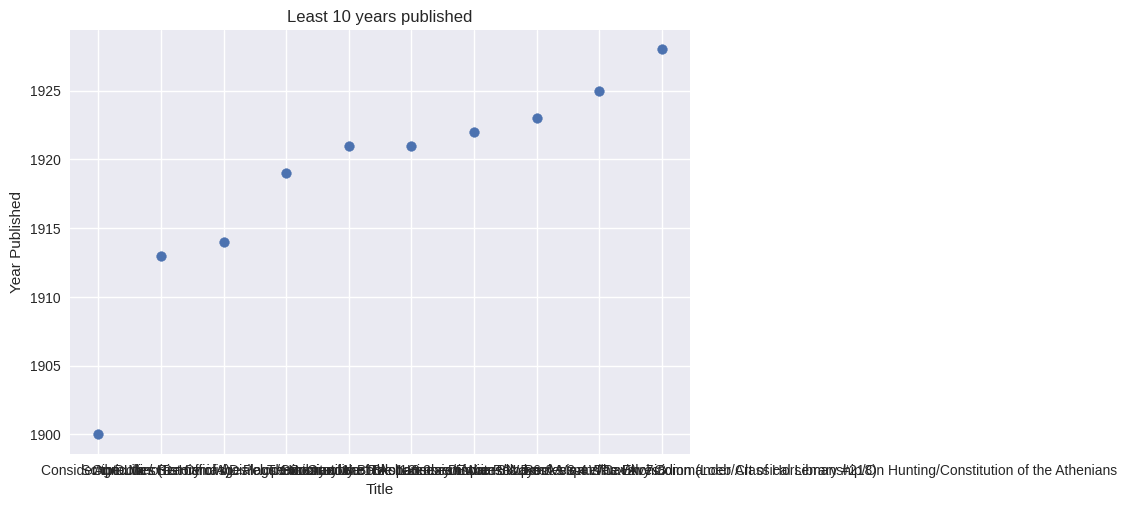

In [ ]:
x=least_published_year['title']
y=least_published_year['year_published']
plt.style.use('seaborn')
ax=plt.axes
plt.scatter(x,y)
plt.xlabel('Title')
plt.ylabel('Year Published')
plt.title('Least 10 years published')
plt.show()

In [ ]:
least_publisher=data.sort_values(by='title', ascending=True).head(10)
least_publisher

title  \
1847                       said the shotgun to the head.   
4073   $30 Film School: How to Write  Direct  Produce...   
1572                                        'Salem's Lot   
3137                  1 000 Places to See Before You Die   
2343                                       10 lb Penalty   
10333              100 Great Fantasy Short Short Stories   
3077                                    100 Love Sonnets   
145                               100 Years of Lynchings   
223                                   1000 Record Covers   
6852       1000 Rings: Inspiring Adornments for the Hand   

                                                 authors average_rating  \
1847                                       Saul Williams           4.22   
4073                                     Michael W. Dean           3.49   
1572                      Stephen King/Jerry N. Uelsmann           4.25   
3137                                    Patricia Schultz           3.85   
2343                                        Dick Francis            3.9   
10333  Isaac Asimov/Terry Carr/Martin H. Greenberg/Ja...           3.91   
3077                       Pablo Neruda/Stephen Tapscott           4.39   
145                                       Ralph Ginzburg           4.61   
223            Michael Ochs/Patrick Javault/Ulrike Wasel           3.85   
6852         Marthe Le Van/Robert W. Ebendorf/Lark Books           4.23   

      language_code   num_pages  ratings_count  text_reviews_count  \
1847          en-US         192           2762                 214   
4073            eng         528             30                   4   
1572            eng         594          84123                 571   
3137            eng         992          36303                 439   
2343            eng         320           3490                 177   
10333           eng         395            204                  19   
3077            eng         232          12613                 392   
145             eng         270             88                   4   
223             mul         575            288                  31   
6852            eng         416             82                   9   

                        publisher  year_published  
1847                    MTV Books          2003.0  
4073             Cengage Learning          2003.0  
1572                    Doubleday          2005.0  
3137   Workman Publishing Company          2003.0  
2343           G.P. Putnam's Sons          2004.0  
10333                        Avon          1985.0  
3077    University of Texas Press          1986.0  
145           Black Classic Press          1996.0  
223                       Taschen          2005.0  
6852                   Lark Books          2004.0

In [ ]:
top_rated_books=data.sort_values(by='average_rating', ascending=False).head(10)
top_rated_books

title  \
4126  Zone of the Enders: The 2nd Runner Official St...   
5025  The Complete Theory Fun Factory: Music Theory ...   
5478  The Goon Show  Volume 11: He's Fallen in the W...   
5649                                Winchester Shotguns   
5650  Colossians and Philemon: A Critical and Exeget...   
6187                          Taxation of Mineral Rents   
6250                        The New Big Book of America   
1243  Middlesex Borough (Images of America: New Jersey)   
8547       Fanning the Flame: Bible  Cross  and Mission   
855   Literature Circle Guide: Bridge to Terabithia:...   

                                               authors average_rating  \
4126                                        Tim Bogenn              5   
5025                   Ian        Martin/Katie Elliott              5   
5478                                        NOT A BOOK              5   
5649                          Dennis Adler/R.L. Wilson              5   
5650                                    R. McL. Wilson              5   
6187                                      Ross Garnaut              5   
6250                              Todd Davis/Marc Frey              5   
1243              Middlesex Borough Heritage Committee              5   
8547  Chris    Green/Chris Wright/Paul Douglas Gardner              5   
855                                     Tara MacCarthy              5   

     language_code   num_pages  ratings_count  text_reviews_count  \
4126           eng         128              2                   0   
5025           eng          96              1                   0   
5478           eng           2              2                   0   
5649           eng         372              2                   0   
5650           eng         512              1                   0   
6187           eng         350              1                   0   
6250           eng          56              2                   1   
1243           eng         128              2                   0   
8547           eng         336              1                   1   
855            eng          32              4                   1   

                         publisher  year_published  
4126                    BradyGames          2003.0  
5025           Boosey & Hawkes Inc          2004.0  
5478            BBC Physical Audio          1995.0  
5649               Chartwell Books          2008.0  
5650               T&T Clark Int'l          2005.0  
6187  Oxford University Press  USA          1983.0  
6250                 Courage Books          2002.0  
1243            Arcadia Publishing          2003.0  
8547                     Zondervan          2003.0  
855             Teaching Resources          2002.0

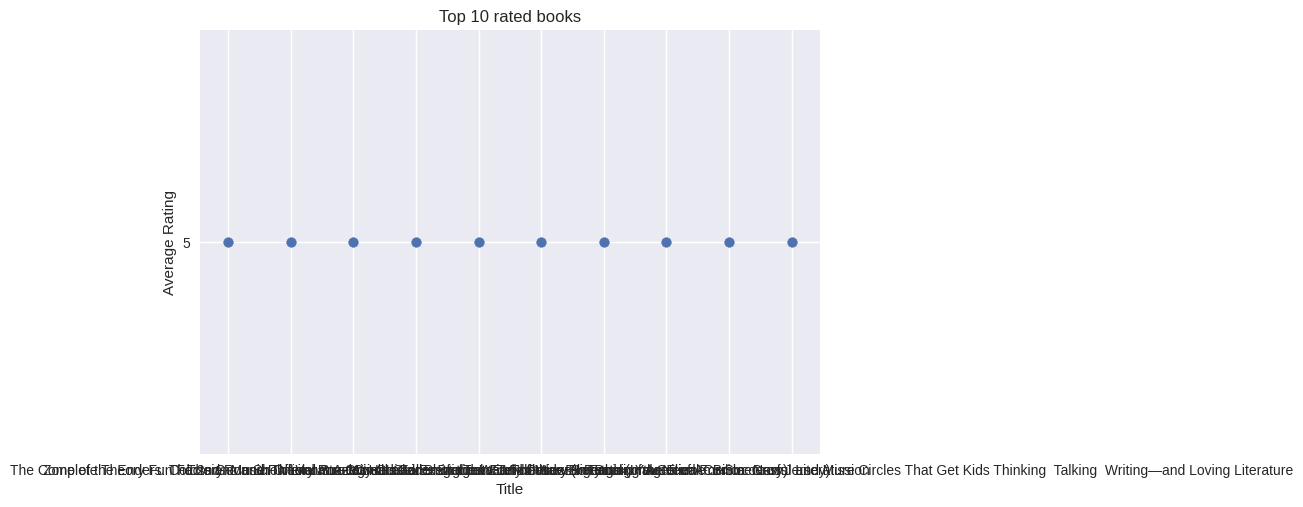

In [ ]:
x=top_rated_books['title']
y=top_rated_books['average_rating']
plt.style.use('seaborn')
ax=plt.axes
plt.scatter(x,y)
plt.xlabel('Title')
plt.ylabel('Average Rating')
plt.title('Top 10 rated books')
plt.show()

In [ ]:
most_year_published=data['year_published'].value_counts()
most_year_published

year_published
2006.0    1599
2005.0    1158
2004.0     976
2003.0     852
2002.0     746
          ... 
1923.0       1
1943.0       1
1947.0       1
1929.0       1
1940.0       1
Name: count, Length: 86, dtype: int64

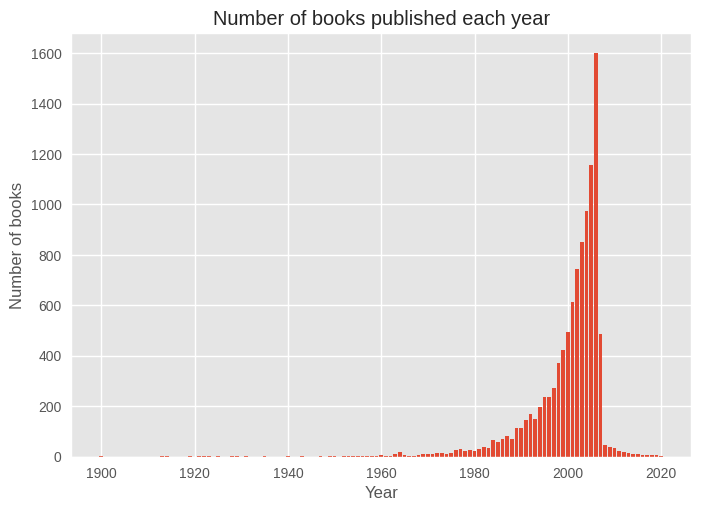

In [ ]:
x=most_year_published
plt.style.use('ggplot')
ax=plt.axes
plt.bar(x.index,x.values)
plt.xlabel('Year')
plt.ylabel('Number of books')
plt.title('Number of books published each year')
plt.show()

In [ ]:
most_book_reviews=data.sort_values(by='text_reviews_count', ascending=False).head(10)
most_book_reviews

title  \
10340                            Twilight (Twilight  #1)   
5272                                      The Book Thief   
1069                           The Giver (The Giver  #1)   
10704                                Water for Elephants   
7312   The Lightning Thief (Percy Jackson and the Oly...   
5409                                     Eat  Pray  Love   
2060                                    The Glass Castle   
1462                              The Catcher in the Rye   
3      Harry Potter and the Prisoner of Azkaban (Harr...   
310               The Da Vinci Code (Robert Langdon  #2)   

                                 authors average_rating language_code  \
10340                    Stephenie Meyer           3.59           eng   
5272   Markus Zusak/Cao Xuân Việt Khương           4.37           eng   
1069                          Lois Lowry           4.13           eng   
10704                         Sara Gruen           4.09           eng   
7312                        Rick Riordan           4.25           eng   
5409                   Elizabeth Gilbert           3.55           eng   
2060                     Jeannette Walls           4.27           eng   
1462                       J.D. Salinger            3.8           eng   
3             J.K. Rowling/Mary GrandPré           4.56           eng   
310                            Dan Brown           3.84           eng   

        num_pages  ratings_count  text_reviews_count  \
10340         501        4597666               94265   
5272          552        1516367               86881   
1069          208        1585589               56604   
10704         335        1260027               52759   
7312          375        1766725               47951   
5409          368        1362264               47620   
2060          288         808656               46176   
1462          277        2457092               43499   
3             435        2339585               36325   
310           489        1679706               35877   

                       publisher  year_published  
10340  Little  Brown and Company          2006.0  
5272             Alfred A. Knopf          2006.0  
1069                       Ember          2006.0  
10704            Algonquin Books          2007.0  
7312       Disney Hyperion Books          2006.0  
5409             Riverhead Books          2007.0  
2060                    Scribner          2006.0  
1462              Back Bay Books          2001.0  
3                Scholastic Inc.          2004.0  
310                       Anchor          2006.0

Text(0.5, 1.0, 'Number of reviews for each book')

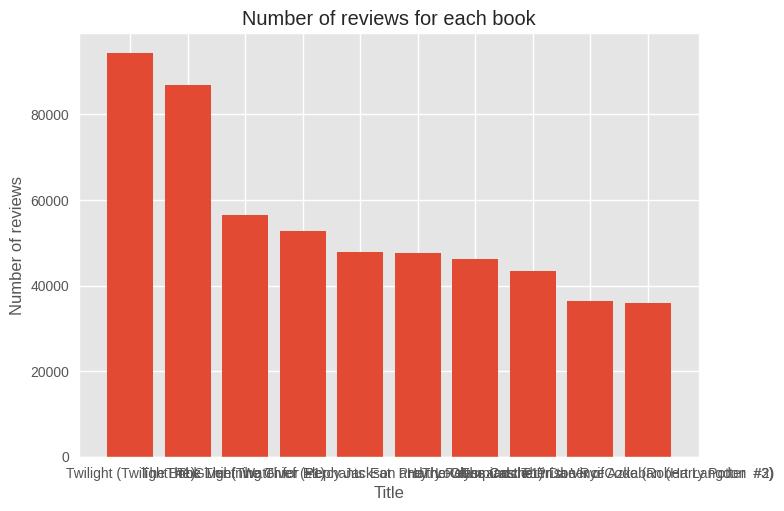

In [ ]:
x=most_book_reviews
plt.style.use('ggplot')
ax=plt.axes
plt.bar(x['title'],x['text_reviews_count'])
plt.xlabel('Title')
plt.ylabel('Number of reviews')
plt.title('Number of reviews for each book')

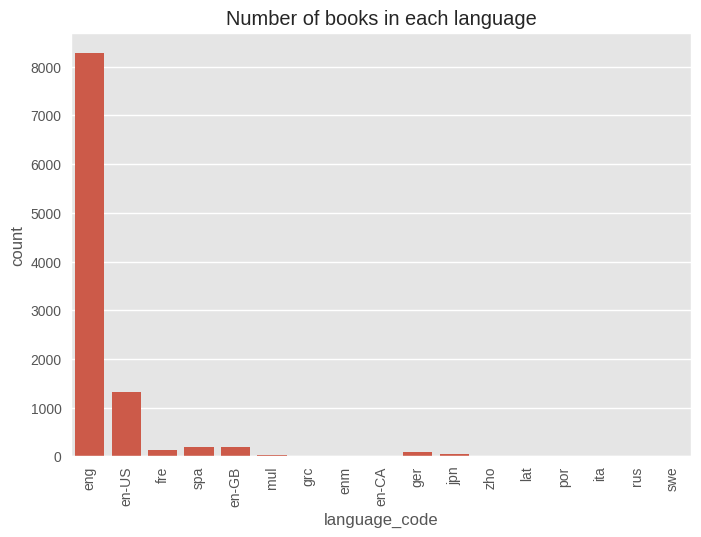

In [ ]:
sns.countplot(data,x='language_code')
sns.color_palette("flare", as_cmap=True)
plt.xticks(rotation=90)
plt.title('Number of books in each language')
plt.show()

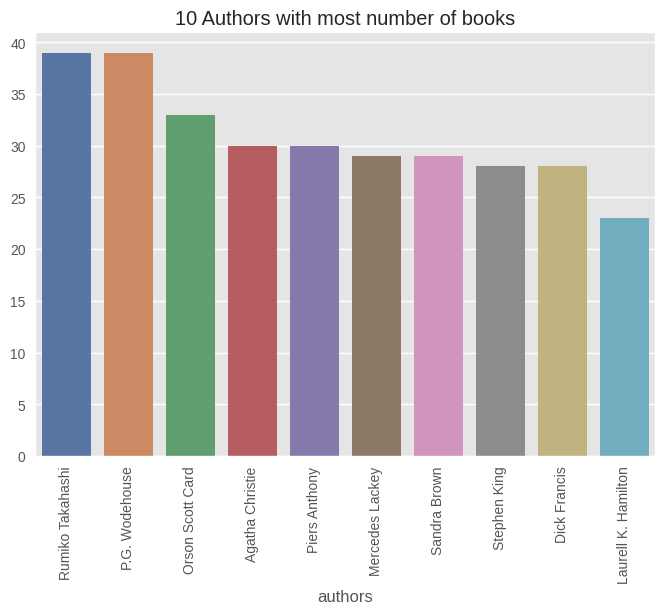

In [ ]:
# Calculate the count of books for each author
author_counts = data['authors'].value_counts().head(10)

# Create the barplot using the author names as x and counts as y
sns.barplot(x=author_counts.index, y=author_counts.values, palette='deep')

plt.xticks(rotation=90)
plt.title('10 Authors with most number of books')
plt.show()

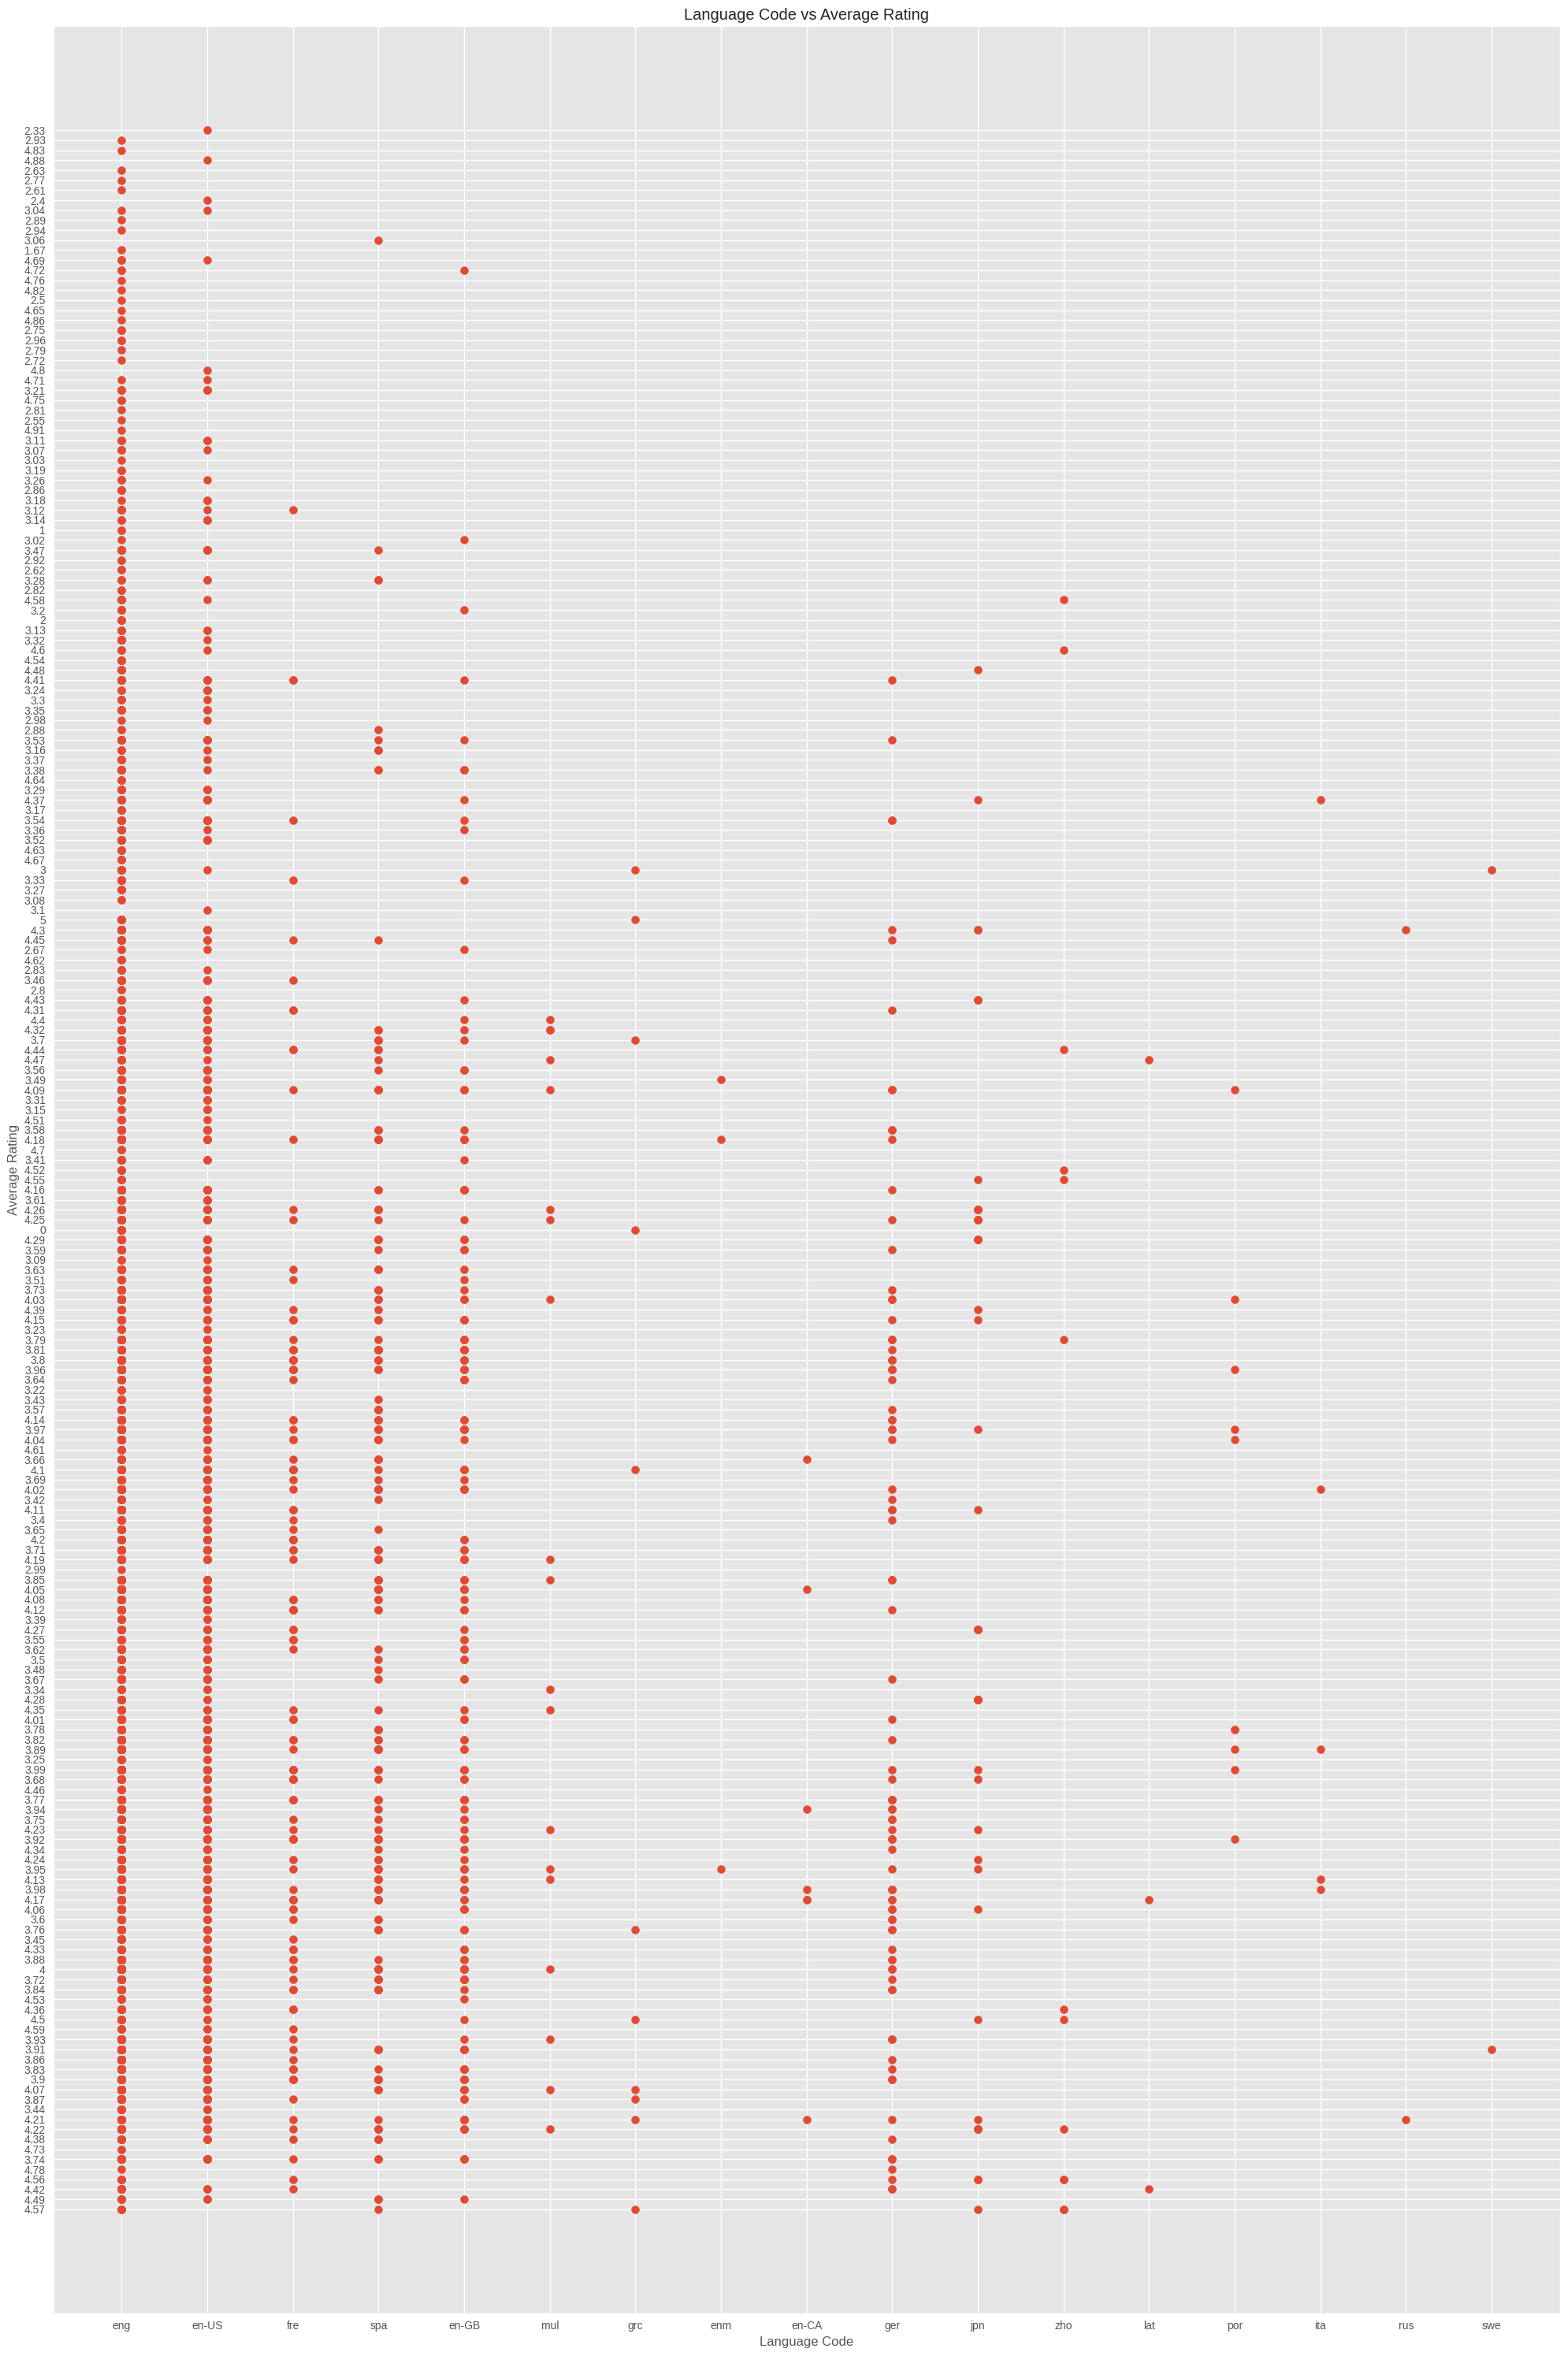

In [ ]:
x=data['language_code']
y=data['average_rating']
plt.figure(figsize=(20,30))
plt.style.use('ggplot')
ax=plt.axes
plt.scatter(x,y)
plt.xlabel('Language Code')
plt.ylabel('Average Rating')
plt.title('Language Code vs Average Rating')
plt.tight_layout()
plt.show()

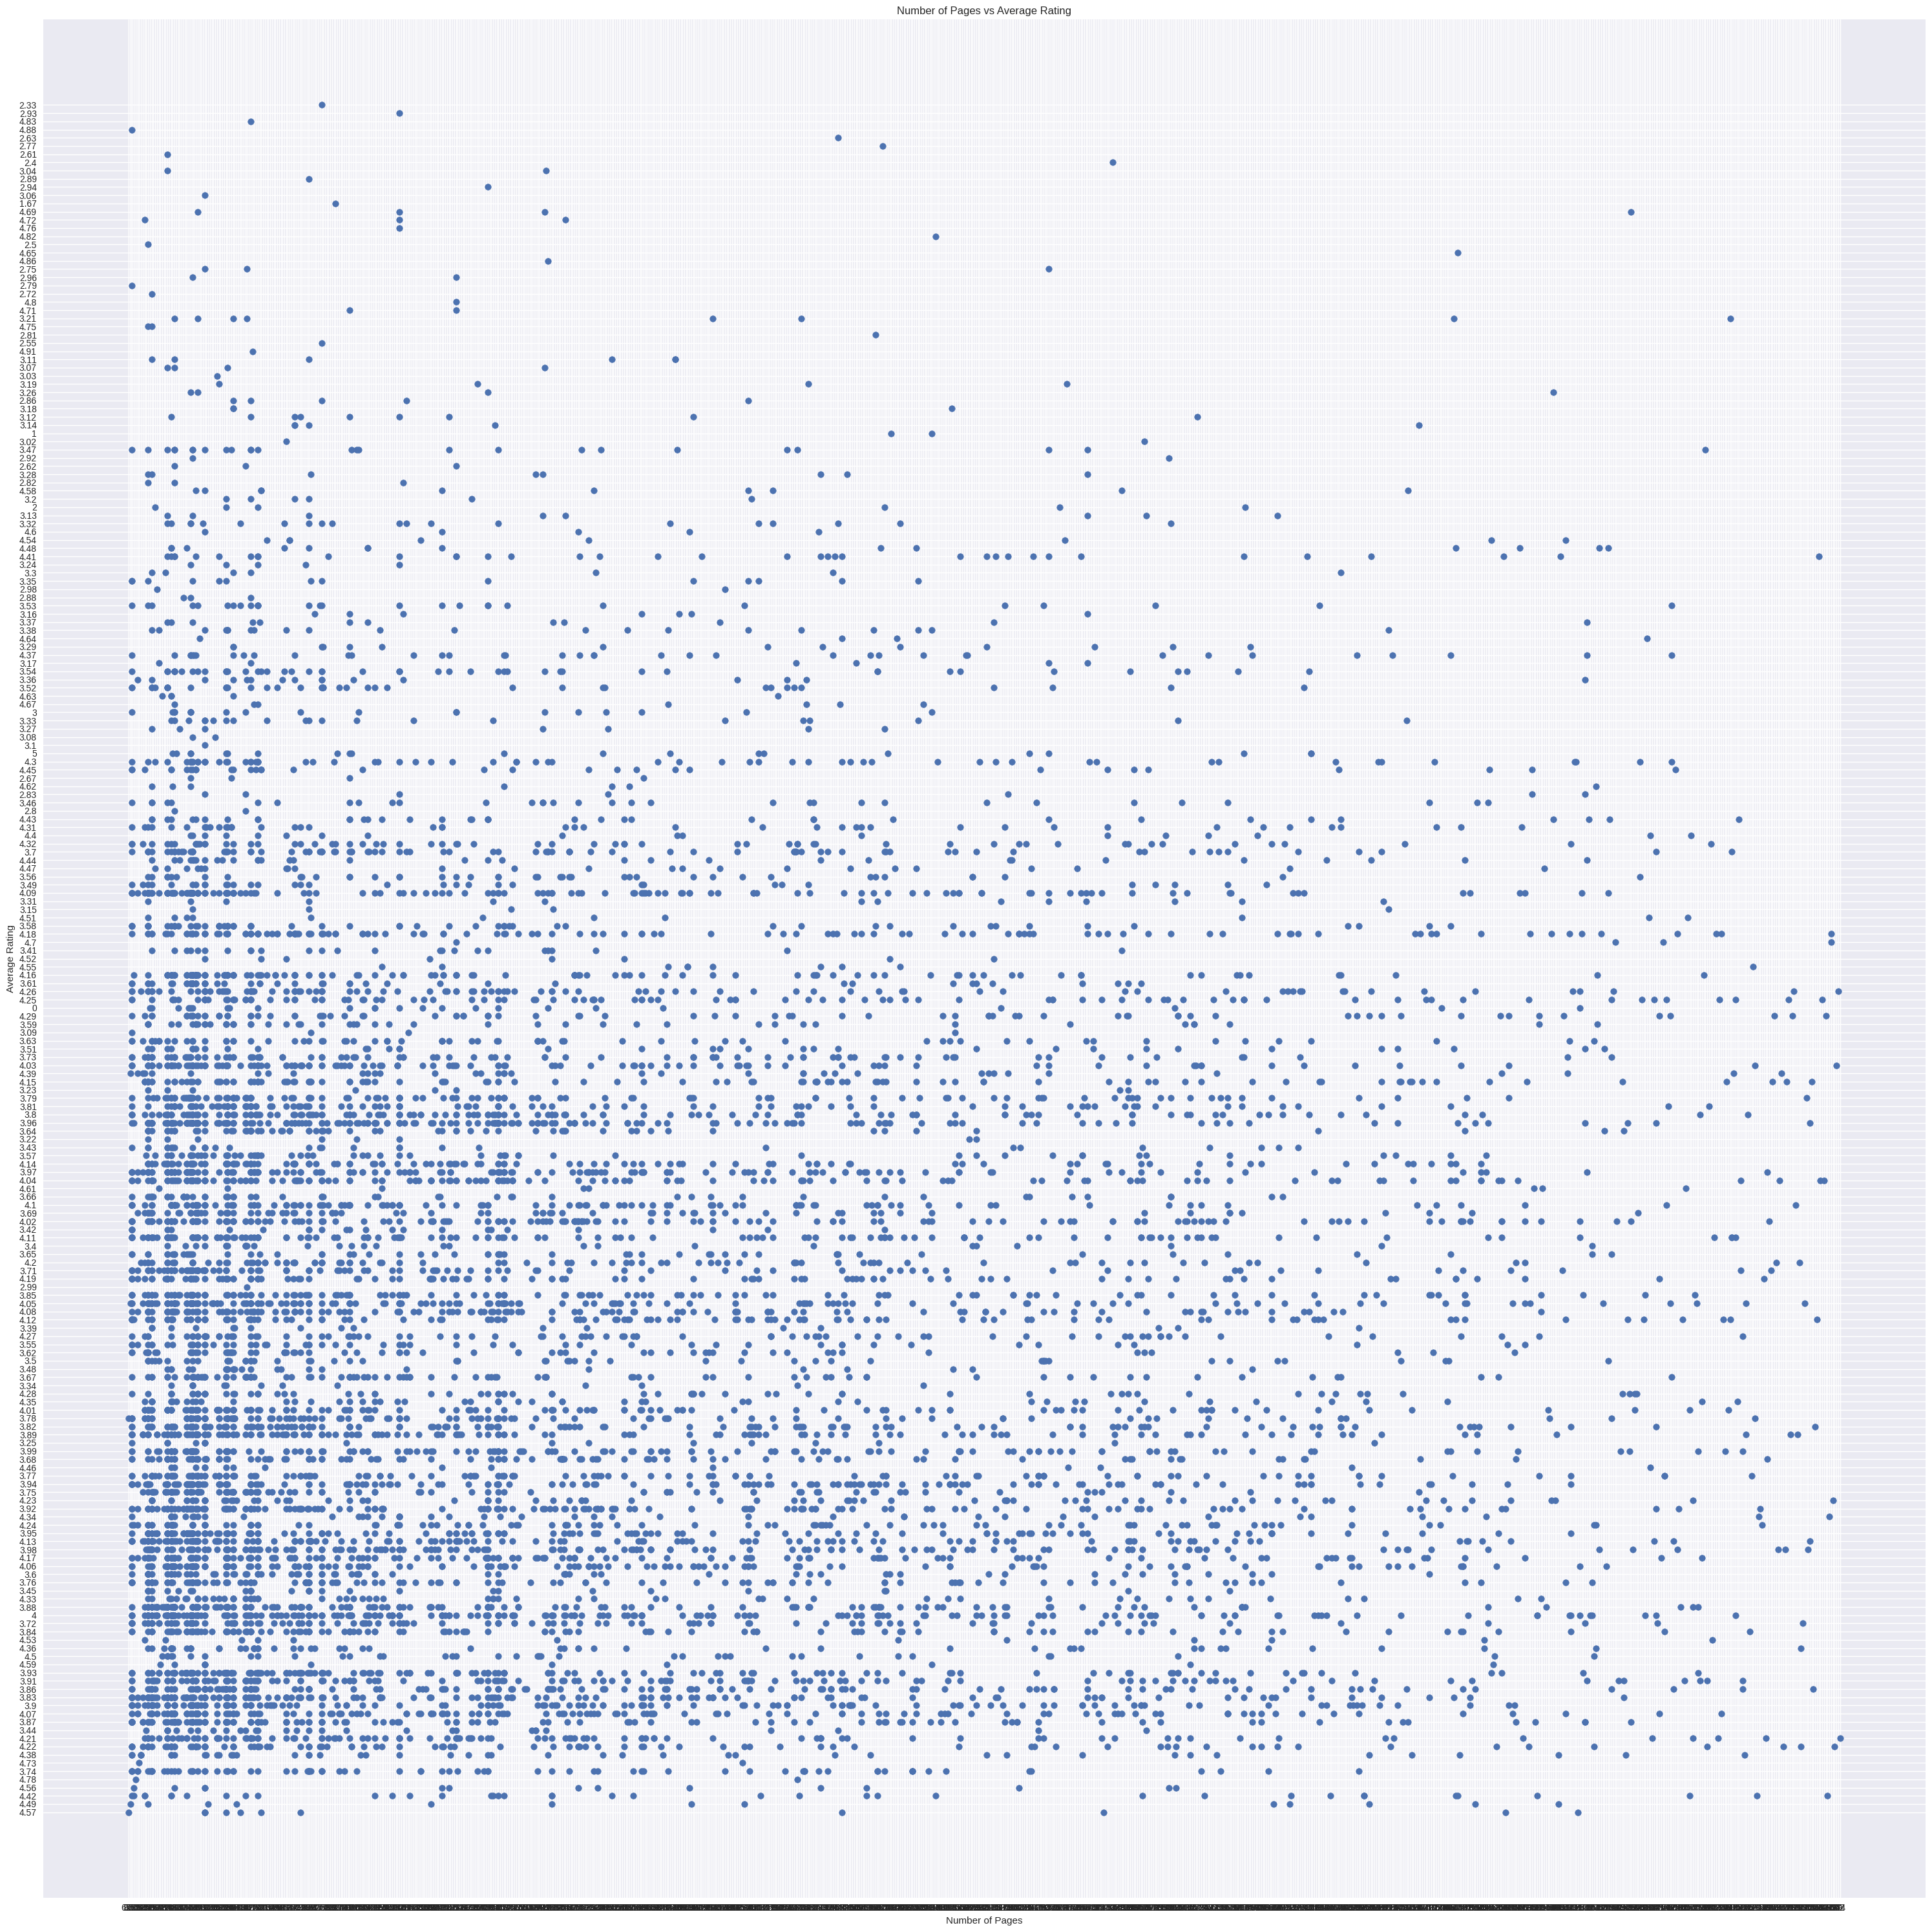

In [ ]:
x=data['  num_pages']
y=data['average_rating']
plt.figure(figsize=(30,30))
plt.style.use('seaborn')
ax=plt.axes
plt.scatter(x,y)
plt.xlabel('Number of Pages')
plt.ylabel('Average Rating')
plt.title('Number of Pages vs Average Rating')
plt.tight_layout()
plt.show()


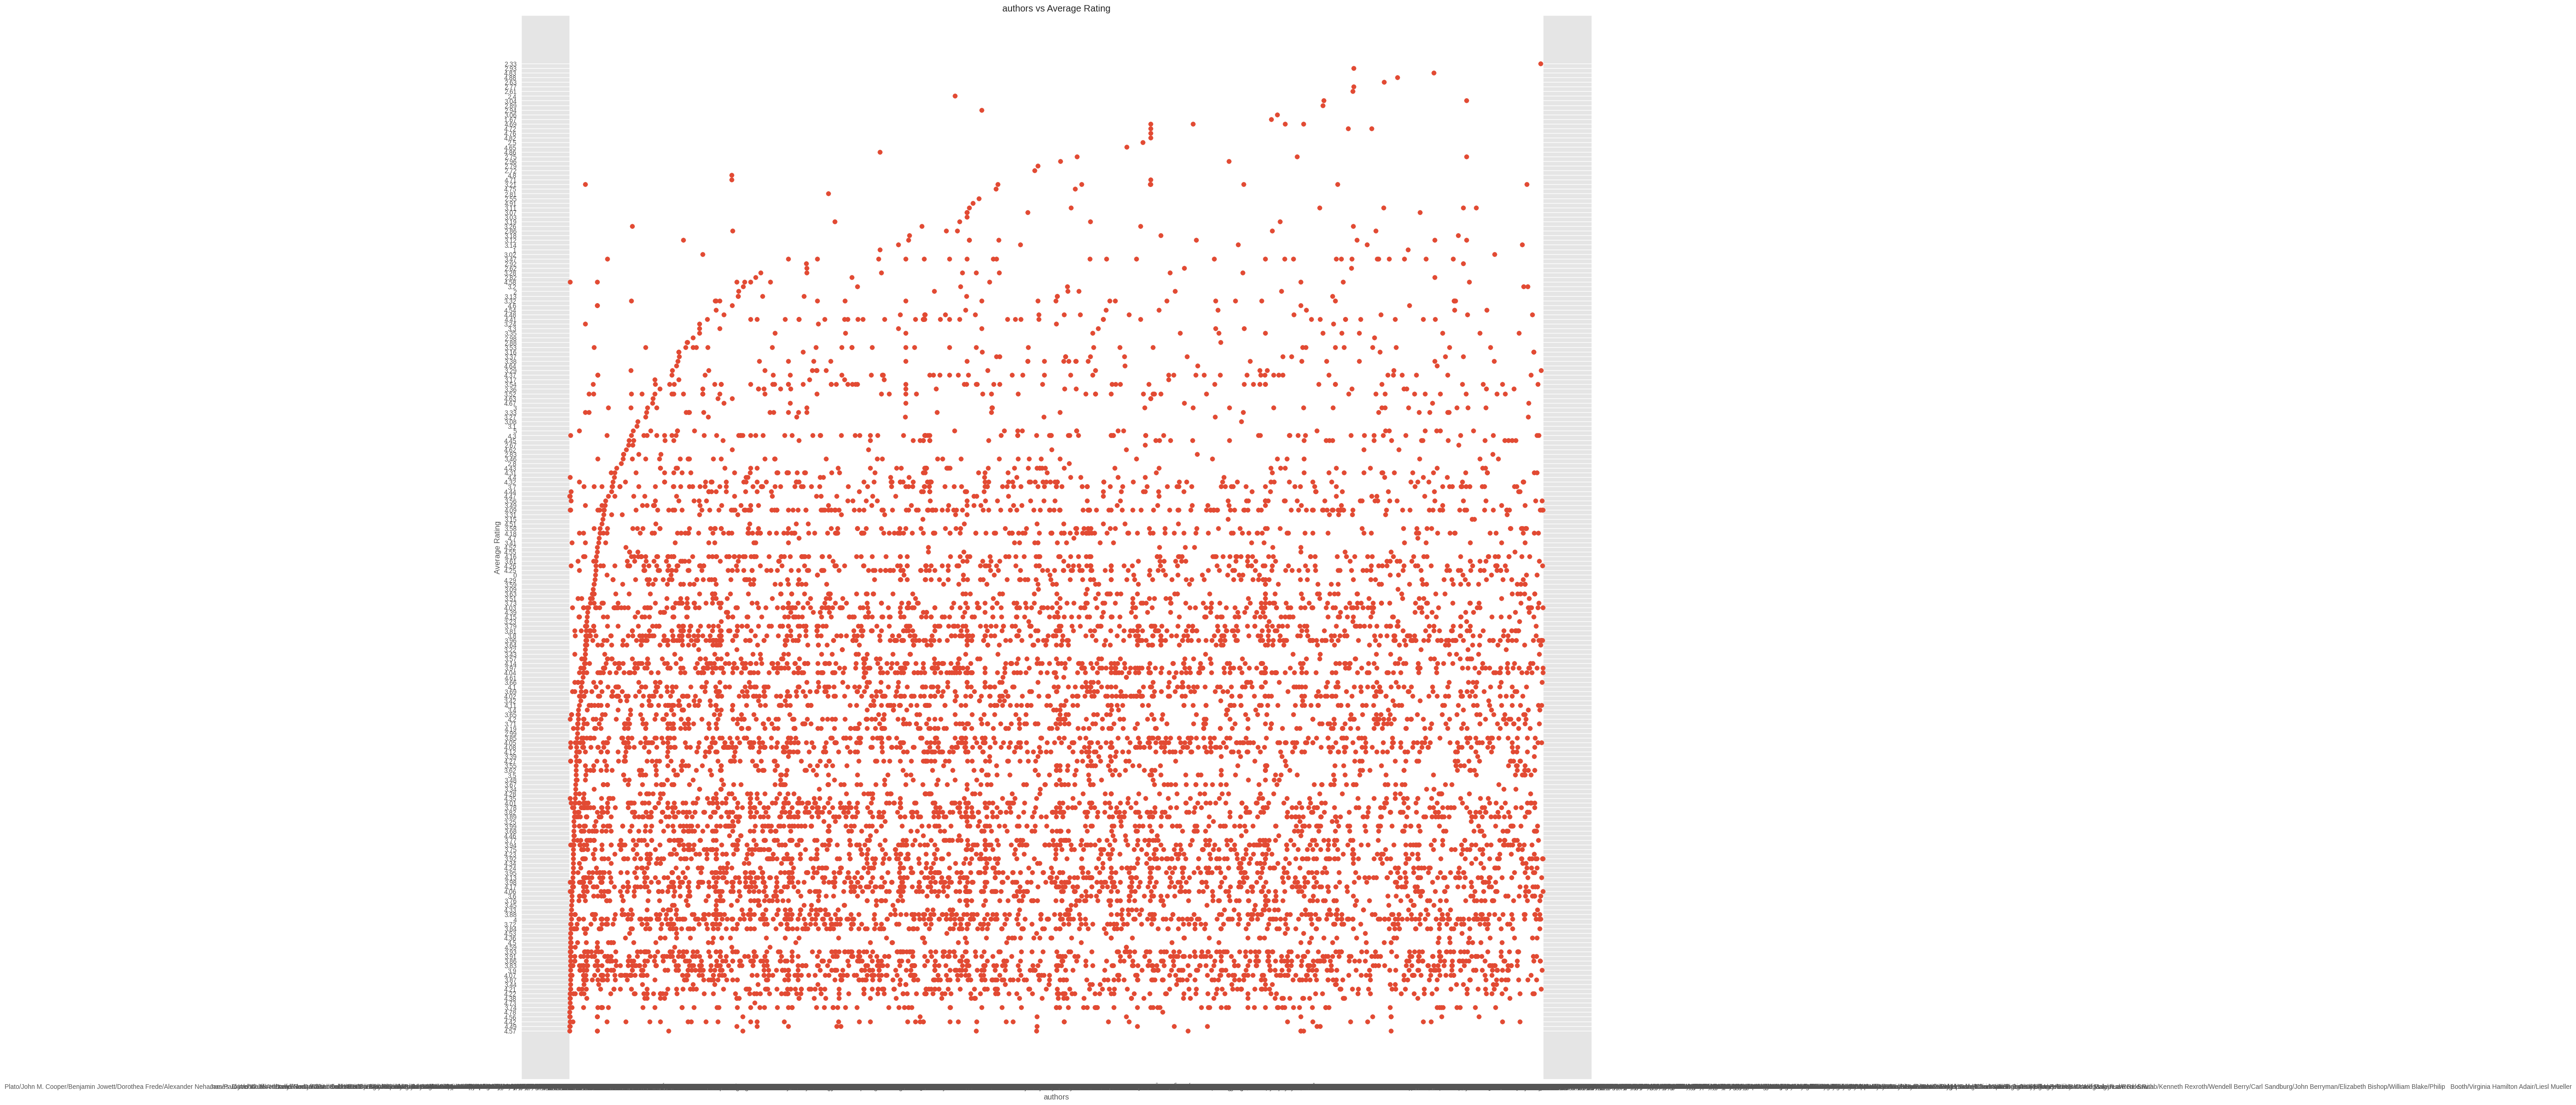

In [ ]:
x=data['authors']
y=data['average_rating']
plt.figure(figsize=(30,30))
plt.style.use('ggplot')
ax=plt.axes
plt.scatter(x,y)
plt.xlabel('authors')
plt.ylabel('Average Rating')
plt.title('authors vs Average Rating')
plt.tight_layout()
plt.show()

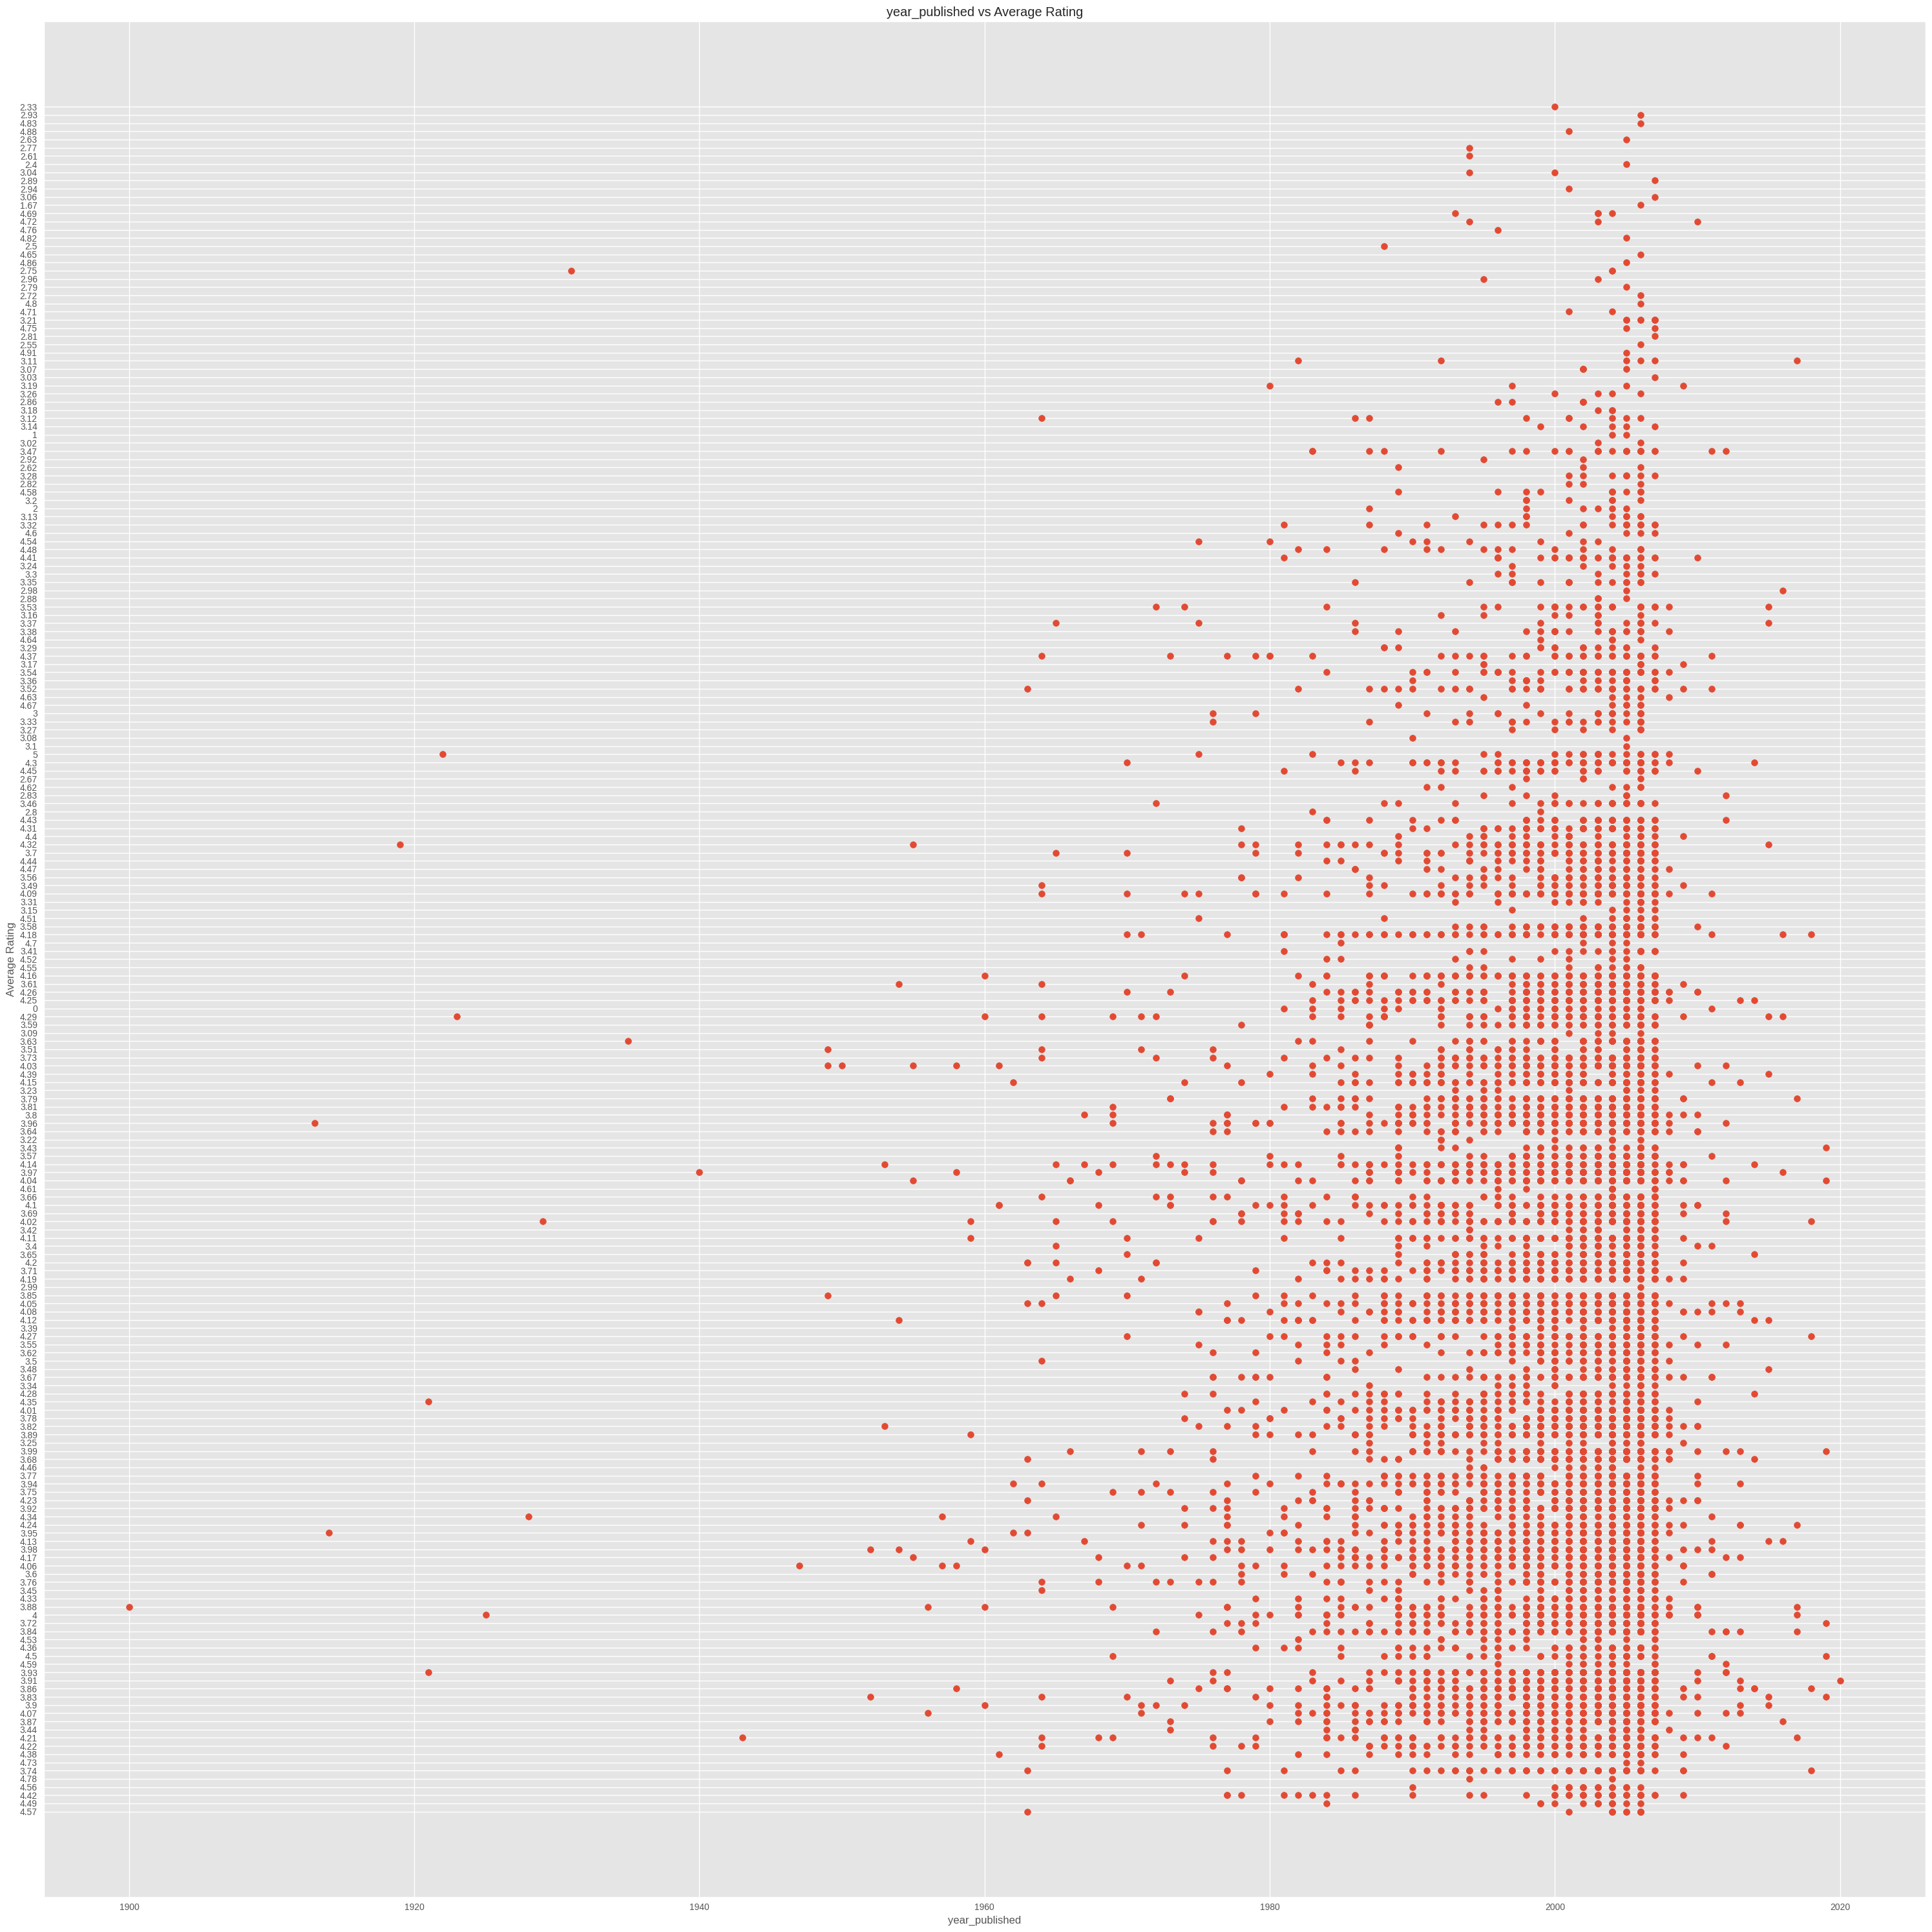

In [ ]:
x=data['year_published']
y=data['average_rating']
plt.figure(figsize=(30,30))
plt.style.use('fast')
ax=plt.axes
plt.scatter(x,y)
plt.xlabel('year_published')
plt.ylabel('Average Rating')
plt.title('year_published vs Average Rating')
plt.tight_layout()
plt.show()

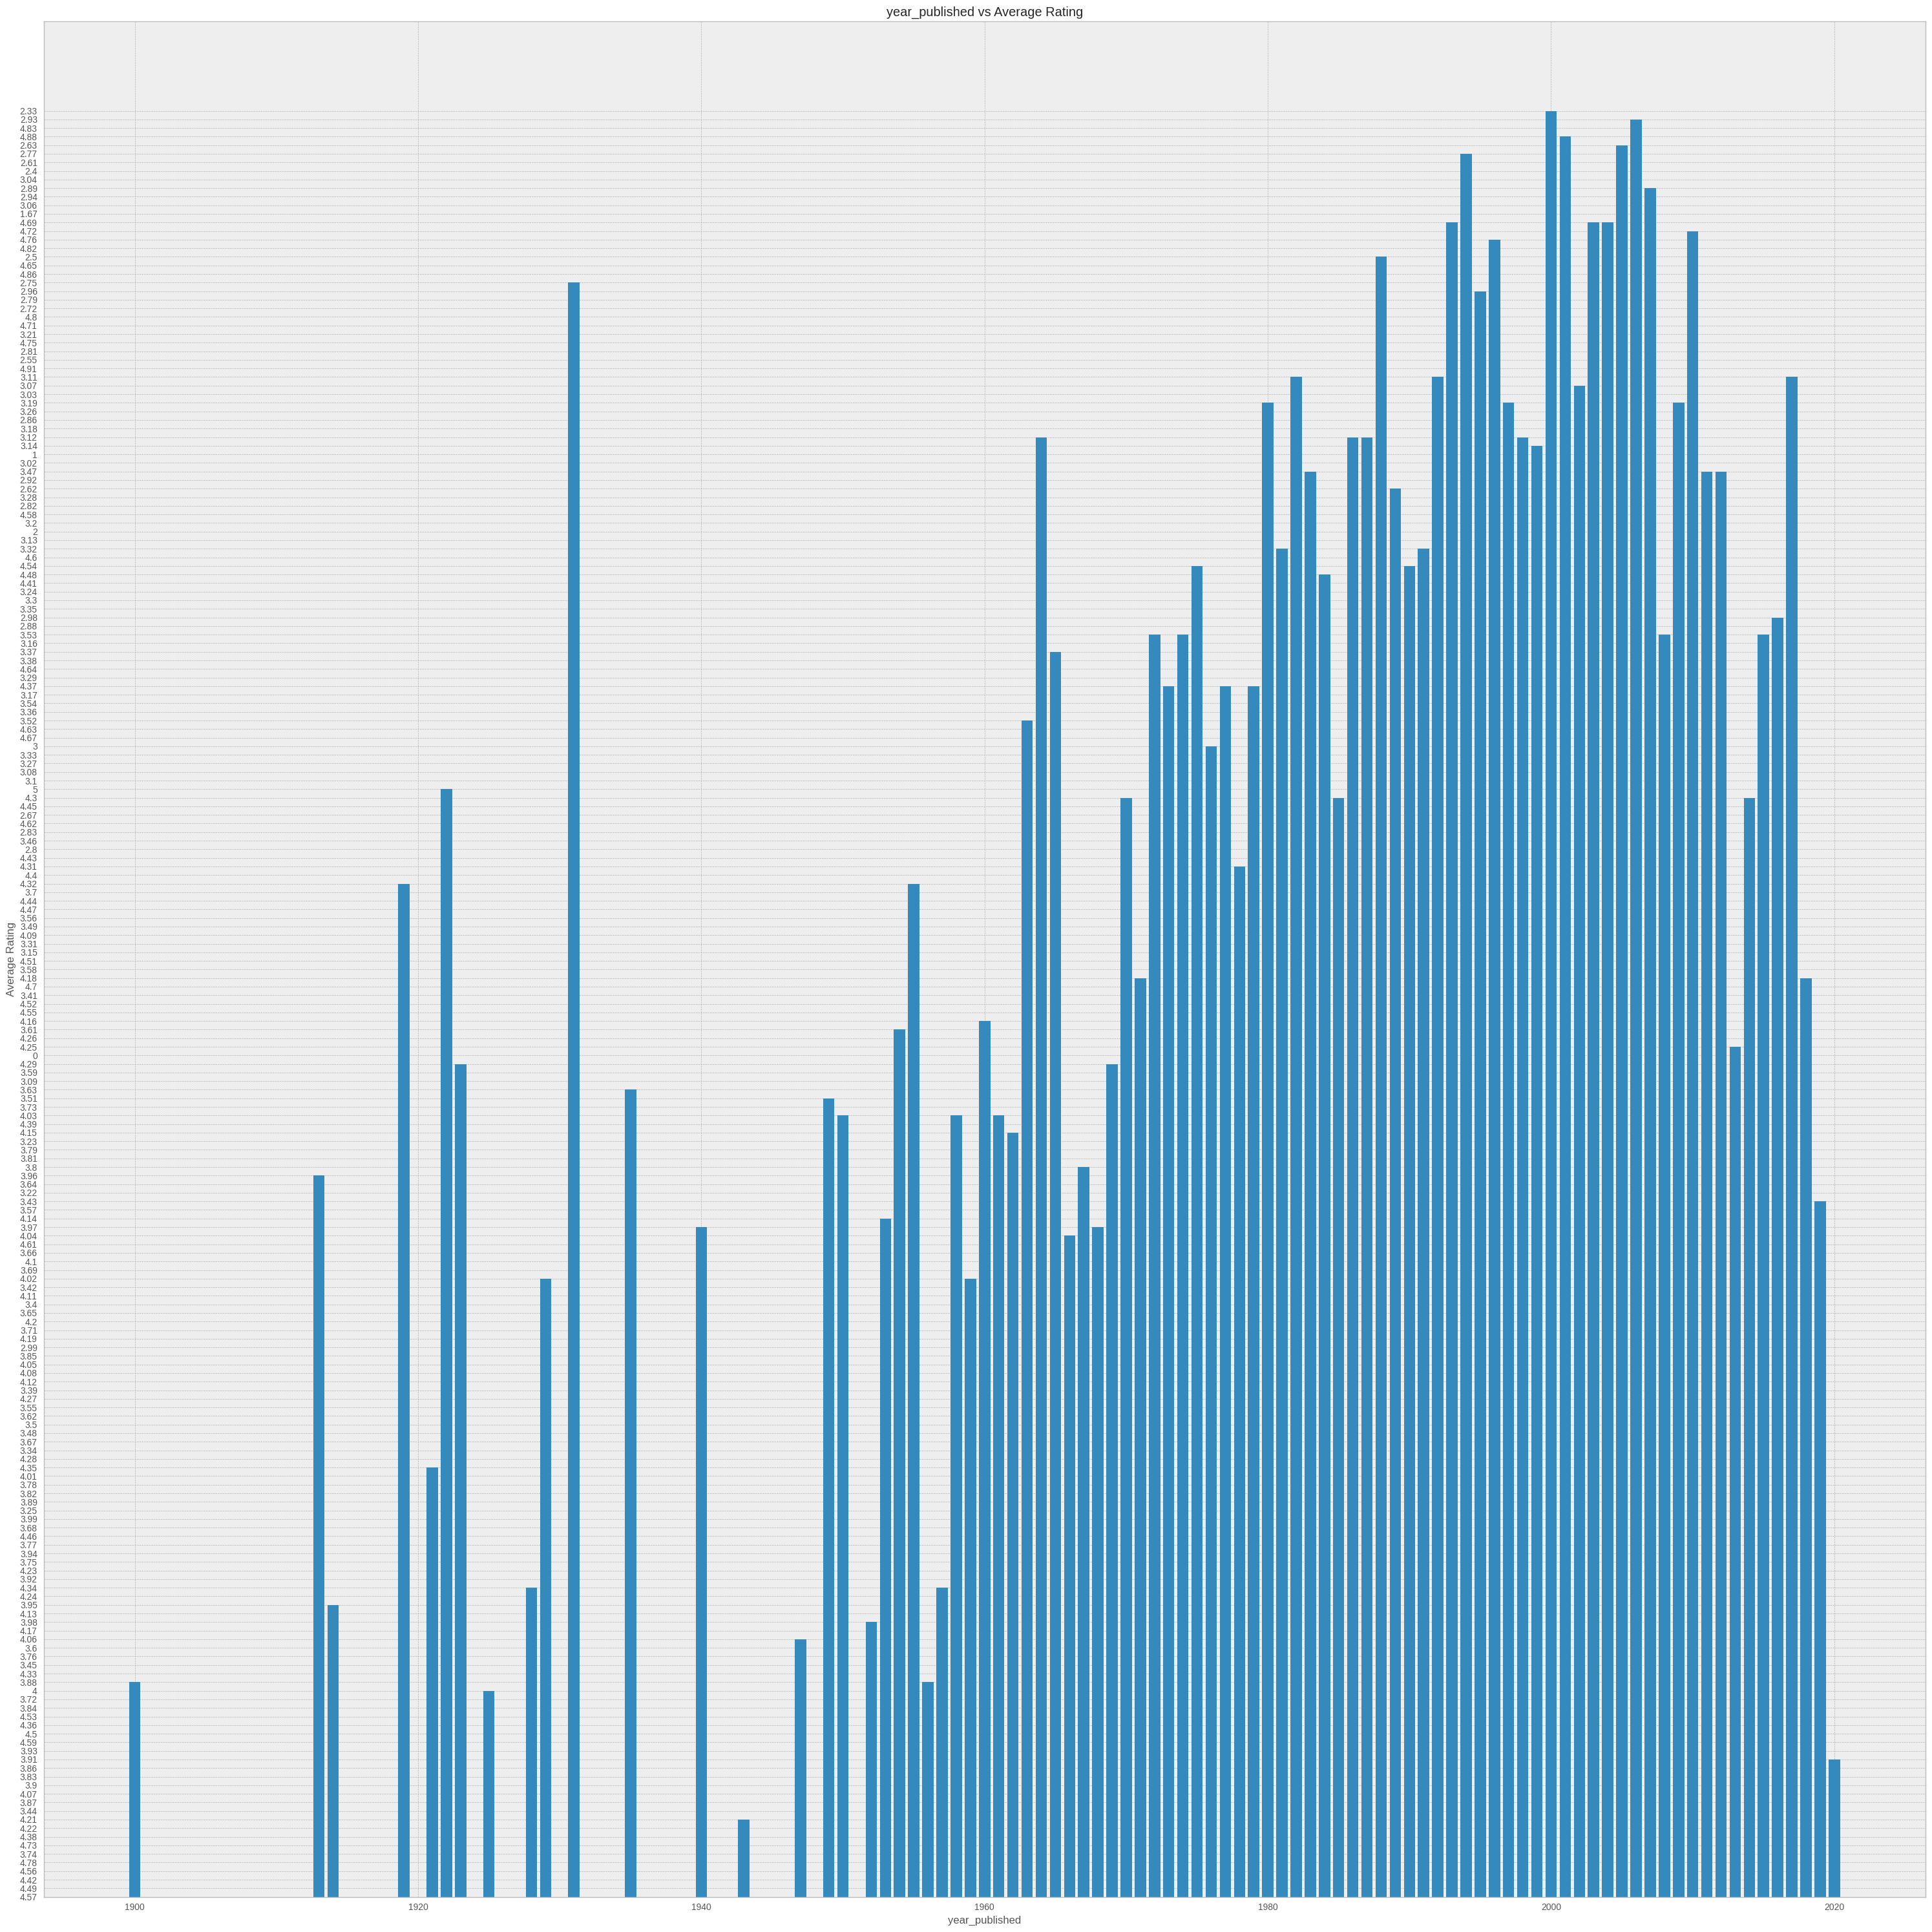

In [ ]:
x=data['year_published']
y=data['average_rating']
plt.figure(figsize=(30,30))
plt.style.use('bmh')
ax=plt.axes
plt.bar(x,y)
plt.xlabel('year_published')
plt.ylabel('Average Rating')
plt.title('year_published vs Average Rating')
plt.tight_layout()
plt.show()

<Figure size 800x550 with 0 Axes>

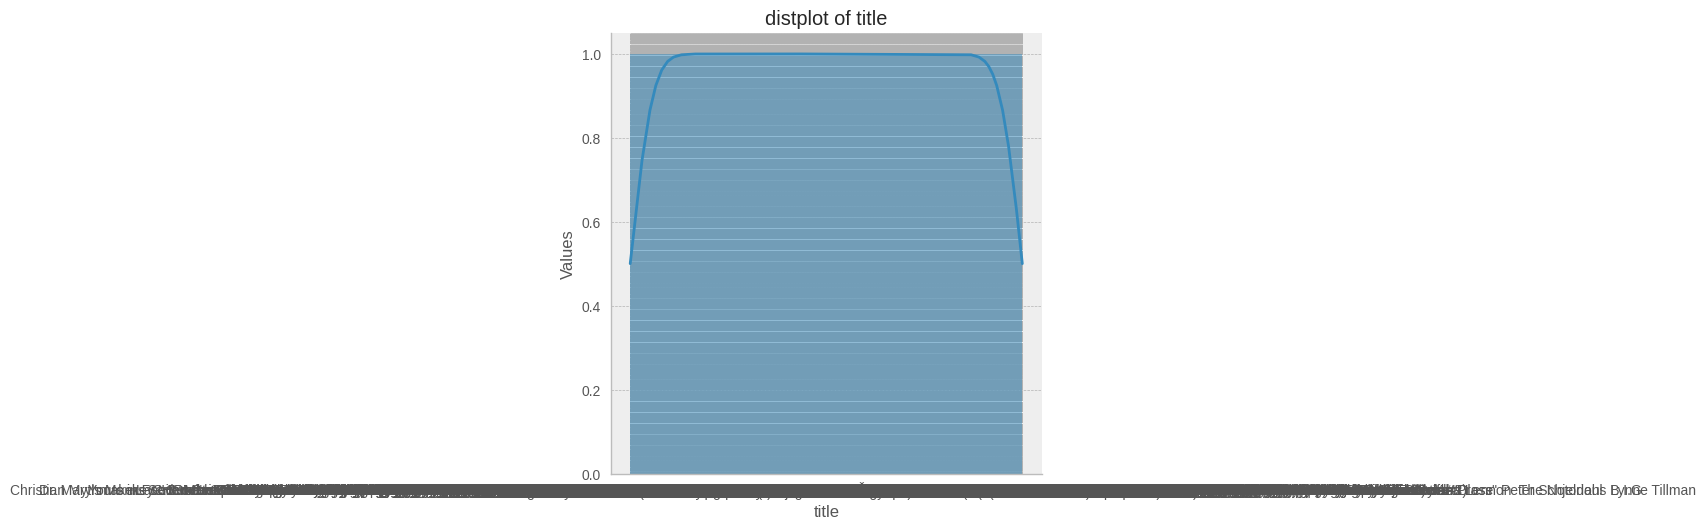

<Figure size 800x550 with 0 Axes>

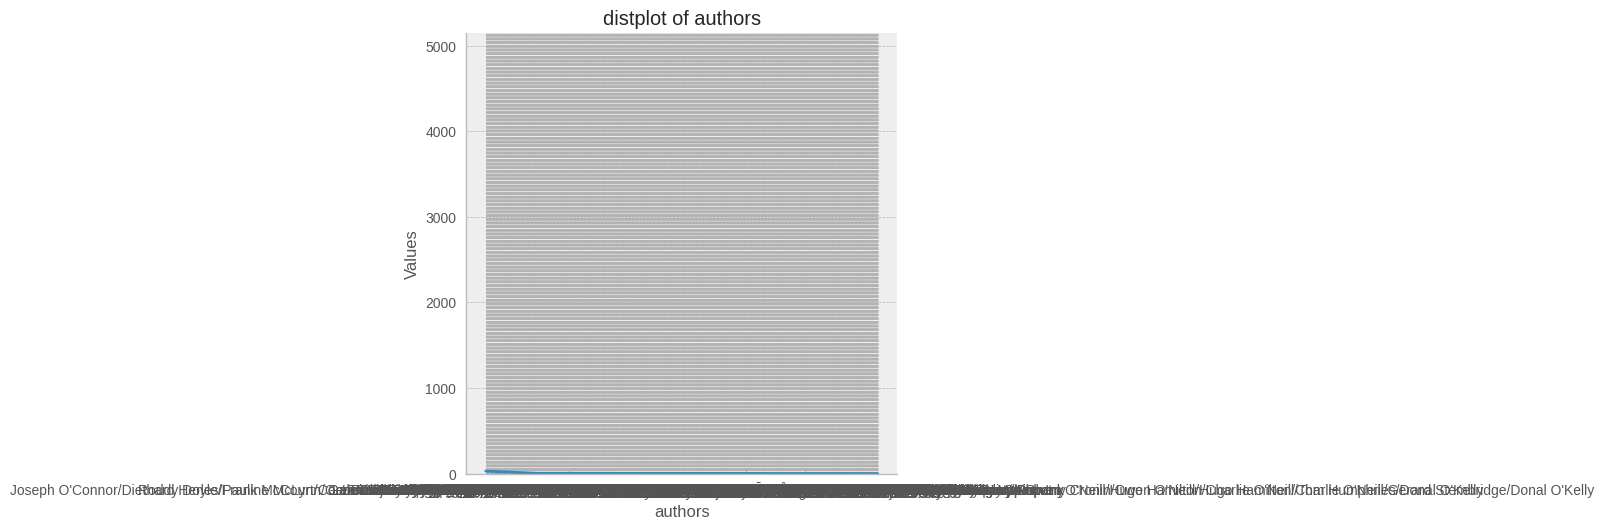

<Figure size 800x550 with 0 Axes>

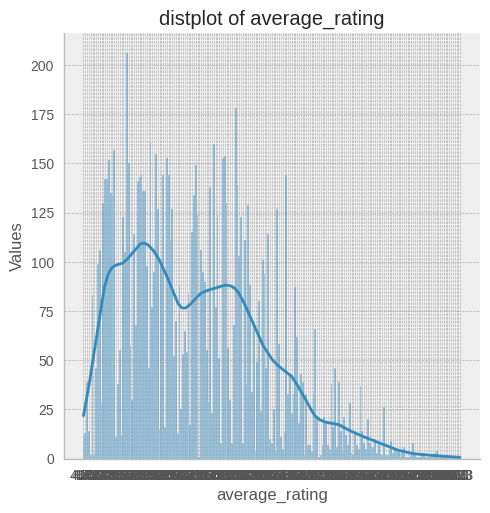

<Figure size 800x550 with 0 Axes>

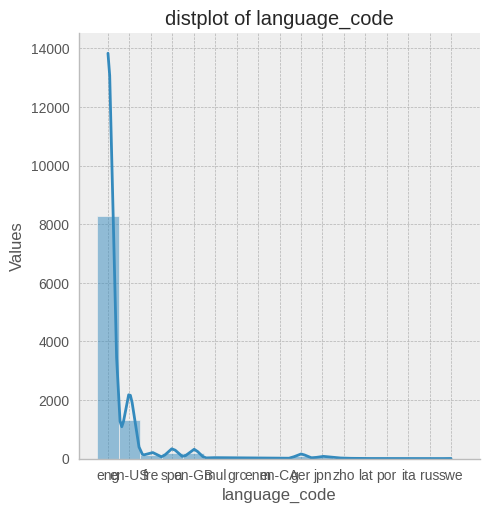

<Figure size 800x550 with 0 Axes>

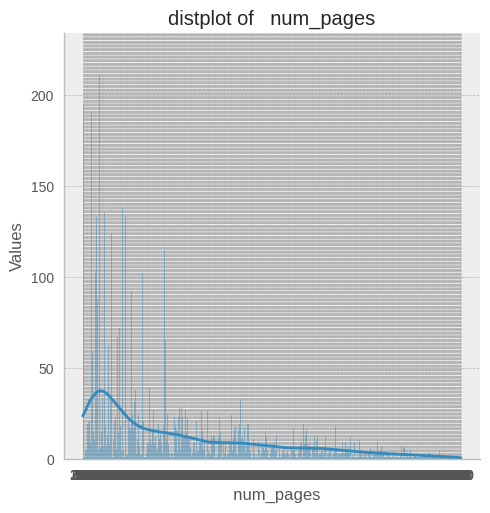

<Figure size 800x550 with 0 Axes>

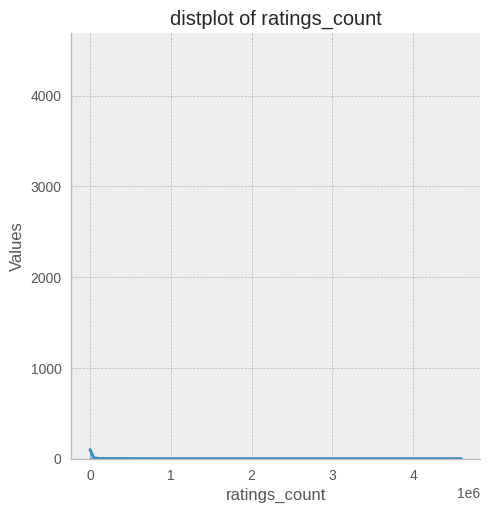

<Figure size 800x550 with 0 Axes>

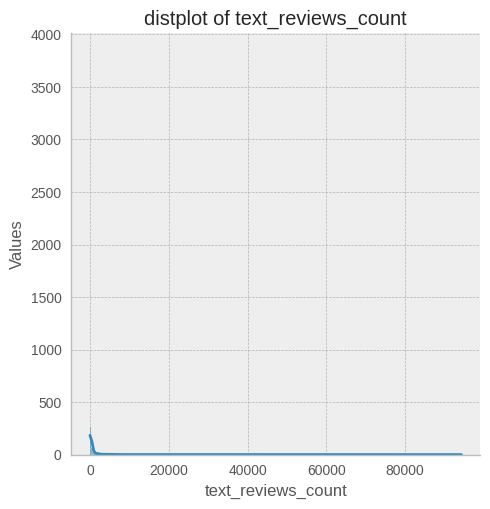

<Figure size 800x550 with 0 Axes>

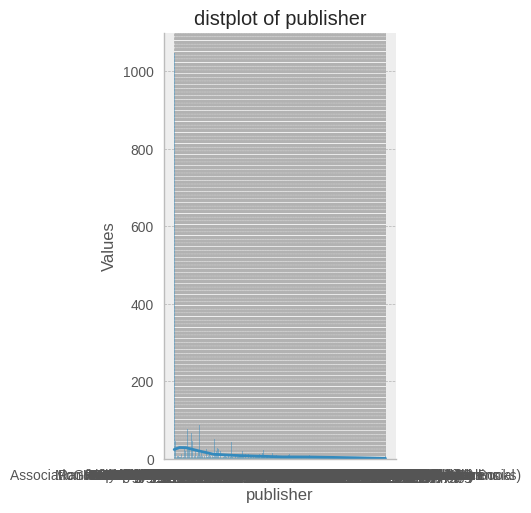

<Figure size 800x550 with 0 Axes>

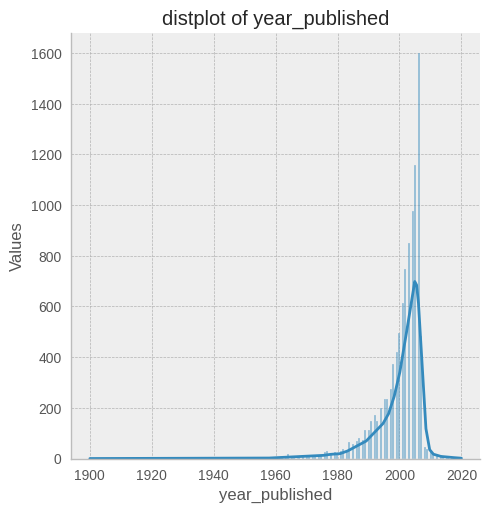

<Figure size 800x550 with 0 Axes>

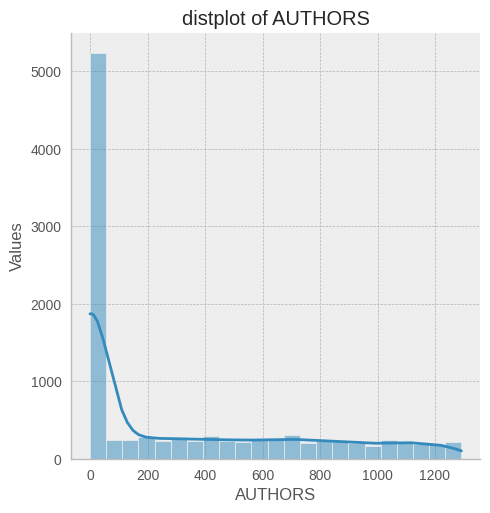

<Figure size 800x550 with 0 Axes>

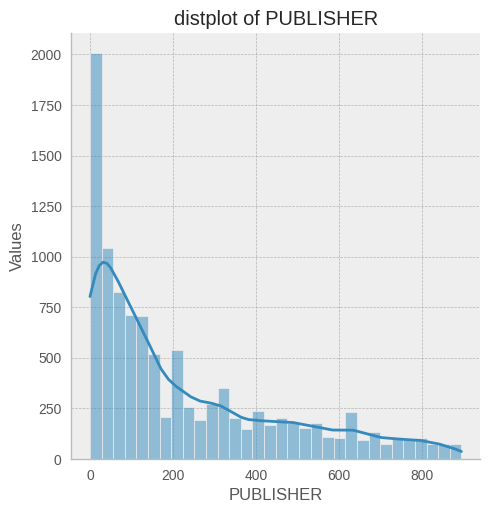

<Figure size 800x550 with 0 Axes>

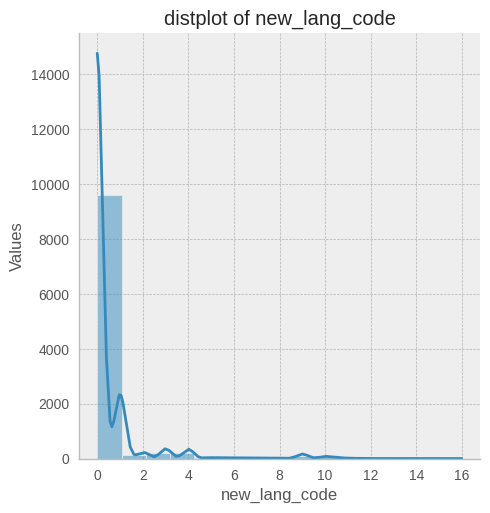

In [ ]:
for column in data.columns:
    plt.figure()  # Create a new figure for each column
    sns.displot(data[column],kde=True)
    plt.title('distplot of {}'.format(column))
    plt.xlabel(column)
    plt.ylabel('Values')

    plt.show()

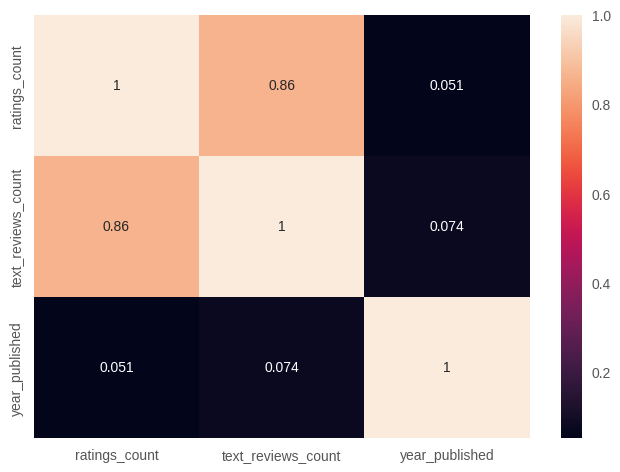

In [ ]:
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10337 entries, 0 to 11126
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               10337 non-null  object 
 1   authors             10337 non-null  object 
 2   average_rating      10337 non-null  object 
 3   language_code       10337 non-null  object 
 4     num_pages         10337 non-null  object 
 5   ratings_count       10337 non-null  int64  
 6   text_reviews_count  10337 non-null  int64  
 7   publisher           10337 non-null  object 
 8   year_published      10337 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 807.6+ KB


In [ ]:
vectorizer = TfidfVectorizer()
new_auth = vectorizer.fit_transform(data['authors'])
clustering = DBSCAN(eps=0.5, min_samples=2).fit(new_auth)
data['AUTHORS'] = clustering.labels_
data.loc[data['AUTHORS'] == -1, 'authors'] = 'outlier'

In [ ]:
new_publi=vectorizer.fit_transform(data['publisher'])
clustering =DBSCAN(eps=0.5, min_samples=2).fit(new_publi)
data['PUBLISHER']=clustering.labels_
data.loc[data['PUBLISHER'] == -1, 'publisher'] = 'outlier'

In [ ]:
new_title=vectorizer.fit_transform(data['title'])
clustering=DBSCAN(eps=1, min_samples=2).fit(new_title)
data['new_title']=clustering.labels_
data.loc[data['new_title'] == -1, 'title'] = 'outlier'

In [ ]:
new_lang_code=vectorizer.fit_transform(data['language_code'])
clustering=DBSCAN(eps=0.5, min_samples=2).fit(new_lang_code)
data['new_lang_code']=clustering.labels_
# Identify and handle outliers (e.g., cluster label -1)
data.loc[data['new_lang_code'] == -1, 'language_code'] = 'outlier'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10337 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               10337 non-null  object 
 1   authors             10337 non-null  object 
 2   average_rating      10337 non-null  object 
 3   language_code       10337 non-null  object 
 4     num_pages         10337 non-null  object 
 5   ratings_count       10337 non-null  int64  
 6   text_reviews_count  10337 non-null  int64  
 7   publisher           10337 non-null  object 
 8   year_published      10337 non-null  float64
 9   AUTHORS             10337 non-null  int64  
 10  PUBLISHER           10337 non-null  int64  
 11  new_lang_code       10337 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [ ]:
x=data.drop(['average_rating',"  num_pages","title","authors","language_code","publisher"],axis=1)
y=data['average_rating']

In [ ]:
y.shape

(10337,)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8269, 6), (2068, 6), (8269,), (2068,))

In [ ]:
x_train

ratings_count  text_reviews_count  year_published  AUTHORS  PUBLISHER  \
6462           1072                  20          2001.0      919        310   
3860           9698                 110          2006.0      646        330   
8194          98823                2552          2004.0      357         56   
3324             79                   6          2002.0       -1         -1   
907           11892                 955          2004.0       -1         47   
...             ...                 ...             ...      ...        ...   
6211           3208                 306          1999.0       -1        308   
5630           3488                  29          2001.0      823        139   
5843             15                   1          2007.0      863        746   
944            2699                 336          1995.0      191        142   
7838            386                  49          2005.0       -1        279   

      new_lang_code  
6462              0  
3860              1  
8194              0  
3324              1  
907               0  
...             ...  
6211              0  
5630              0  
5843              0  
944               0  
7838              0  

[8269 rows x 6 columns]

In [ ]:
scale = StandardScaler()
# Create an instance of StandardScaler to standardize features
scale = StandardScaler()
# Fit the scaler on the training feature set and transform the training data
scaled_Xtrain = scale.fit_transform(x_train)
# Transform the testing feature set using the same scaler
scaled_Xtest=scale.transform(x_test)

In [ ]:
# Create a DataFrame from the scaled training feature set with the original column names
scaled_data = pd.DataFrame(scaled_Xtrain, columns=x_train.columns)
scaled_data

ratings_count  text_reviews_count  year_published   AUTHORS  PUBLISHER  \
0         -0.145921           -0.194870        0.099517  1.476966   0.358013   
1         -0.065531           -0.159620        0.720485  0.803726   0.444059   
2          0.765074            0.796832        0.472098  0.091030  -0.734761   
3         -0.155176           -0.200353        0.223711 -0.791826  -0.979990   
4         -0.045084            0.171339        0.472098 -0.791826  -0.773482   
...             ...                 ...             ...       ...        ...   
8264      -0.126015           -0.082853       -0.148870 -0.791826   0.349409   
8265      -0.123405           -0.191345        0.099517  1.240222  -0.377673   
8266      -0.155772           -0.202312        0.844679  1.338865   2.233799   
8267      -0.130758           -0.071103       -0.645645 -0.318339  -0.364767   
8268      -0.152314           -0.183512        0.596292 -0.791826   0.224643   

      new_lang_code  
0         -0.315317  
1          0.345275  
2         -0.315317  
3          0.345275  
4         -0.315317  
...             ...  
8264      -0.315317  
8265      -0.315317  
8266      -0.315317  
8267      -0.315317  
8268      -0.315317  

[8269 rows x 6 columns]